# DATA QUALITY

This notebook focuses on ensuring the quality and consistency of the raw dataset. 

It includes identifying and correcting data types, removing duplicates, handling missing values, detecting outliers, and separating numerical and categorical variables. 

The goal is to produce a clean, reliable analytical base that can be safely used for later transformation, feature engineering, and modeling steps.

## IMPORT LIBRARIES

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Autocomplete
%config IPCompleter.greedy=True

## IMPORT DATASETS

In [42]:
WORK_PATH = '/Users/rober/cmapss-rul-prediction/02_Data/03_Working/'
df_work = pd.read_csv(f"{WORK_PATH}work_FD001.csv")

In [43]:
df_work.shape

(14507, 26)

In [44]:
df_work

unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0                2               1       -0.0018        0.0006         100.0   
1                2               2        0.0043       -0.0003         100.0   
2                2               3        0.0018        0.0003         100.0   
3                2               4        0.0035       -0.0004         100.0   
4                2               5        0.0005        0.0004         100.0   
...            ...             ...           ...           ...           ...   
14502          100             196       -0.0004       -0.0003         100.0   
14503          100             197       -0.0016       -0.0005         100.0   
14504          100             198        0.0004        0.0000         100.0   
14505          100             199       -0.0011        0.0003         100.0   
14506          100             200       -0.0032       -0.0005         100.0   

       sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  \
0        518.67    641.89   1583.84   1391.28     14.62  ...     522.33   
1        518.67    641.82   1587.05   1393.13     14.62  ...     522.70   
2        518.67    641.55   1588.32   1398.96     14.62  ...     522.58   
3        518.67    641.68   1584.15   1396.08     14.62  ...     522.49   
4        518.67    641.73   1579.03   1402.52     14.62  ...     522.27   
...         ...       ...       ...       ...       ...  ...        ...   
14502    518.67    643.49   1597.98   1428.63     14.62  ...     519.49   
14503    518.67    643.54   1604.50   1433.58     14.62  ...     519.68   
14504    518.67    643.42   1602.46   1428.18     14.62  ...     520.01   
14505    518.67    643.23   1605.26   1426.53     14.62  ...     519.67   
14506    518.67    643.85   1600.38   1432.14     14.62  ...     519.30   

       sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  \
0        2388.06    8137.72     8.3905       0.03        391       2388   
1        2387.98    8131.09     8.4167       0.03        392       2388   
2        2387.99    8140.58     8.3802       0.03        391       2388   
3        2387.93    8140.44     8.4018       0.03        391       2388   
4        2387.94    8136.67     8.3867       0.03        390       2388   
...          ...        ...        ...        ...        ...        ...   
14502    2388.26    8137.60     8.4956       0.03        397       2388   
14503    2388.22    8136.50     8.5139       0.03        395       2388   
14504    2388.24    8141.05     8.5646       0.03        398       2388   
14505    2388.23    8139.29     8.5389       0.03        395       2388   
14506    2388.26    8137.33     8.5036       0.03        396       2388   

       sensor_19  sensor_20  sensor_21  
0          100.0      38.94    23.4585  
1          100.0      39.06    23.4085  
2          100.0      39.11    23.4250  
3          100.0      39.13    23.5027  
4          100.0      39.18    23.4234  
...          ...        ...        ...  
14502      100.0      38.49    22.9735  
14503      100.0      38.30    23.1594  
14504      100.0      38.44    22.9333  
14505      100.0      38.29    23.0640  
14506      100.0      38.37    23.0522  

[14507 rows x 26 columns]

In [45]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     14507 non-null  int64  
 1   time_in_cycles  14507 non-null  int64  
 2   op_setting_1    14507 non-null  float64
 3   op_setting_2    14507 non-null  float64
 4   op_setting_3    14507 non-null  float64
 5   sensor_1        14507 non-null  float64
 6   sensor_2        14507 non-null  float64
 7   sensor_3        14507 non-null  float64
 8   sensor_4        14507 non-null  float64
 9   sensor_5        14507 non-null  float64
 10  sensor_6        14507 non-null  float64
 11  sensor_7        14507 non-null  float64
 12  sensor_8        14507 non-null  float64
 13  sensor_9        14507 non-null  float64
 14  sensor_10       14507 non-null  float64
 15  sensor_11       14507 non-null  float64
 16  sensor_12       14507 non-null  float64
 17  sensor_13       14507 non-null 

## DATA TYPES

### Identify

In [46]:
df_work.dtypes

unit_number         int64
time_in_cycles      int64
op_setting_1      float64
op_setting_2      float64
op_setting_3      float64
sensor_1          float64
sensor_2          float64
sensor_3          float64
sensor_4          float64
sensor_5          float64
sensor_6          float64
sensor_7          float64
sensor_8          float64
sensor_9          float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17           int64
sensor_18           int64
sensor_19         float64
sensor_20         float64
sensor_21         float64
dtype: object

- 'unit_number' is categorical (it's just a unit ID)
- all sensors to float to unify types

### Correct

In [47]:
# unit_number to object
df_work['unit_number'] = df_work['unit_number'].astype('category')

# all sensors to float to unify types
sensor_cols = [col for col in df_work.columns if 'sensor_' in col]
df_work[sensor_cols] = df_work[sensor_cols].astype(float)

In [48]:
df_work.dtypes

unit_number       category
time_in_cycles       int64
op_setting_1       float64
op_setting_2       float64
op_setting_3       float64
sensor_1           float64
sensor_2           float64
sensor_3           float64
sensor_4           float64
sensor_5           float64
sensor_6           float64
sensor_7           float64
sensor_8           float64
sensor_9           float64
sensor_10          float64
sensor_11          float64
sensor_12          float64
sensor_13          float64
sensor_14          float64
sensor_15          float64
sensor_16          float64
sensor_17          float64
sensor_18          float64
sensor_19          float64
sensor_20          float64
sensor_21          float64
dtype: object

## UNIQUE VALUES

### Identify

In [49]:
df_work.nunique().sort_values()

sensor_19            1
sensor_18            1
op_setting_3         1
sensor_1             1
sensor_16            1
sensor_5             1
sensor_10            1
sensor_6             2
sensor_17           12
op_setting_2        13
sensor_8            52
sensor_13           55
unit_number         70
sensor_20          115
sensor_11          155
op_setting_1       155
sensor_2           300
time_in_cycles     362
sensor_12          424
sensor_7           499
sensor_15         1839
sensor_3          2814
sensor_4          3789
sensor_21         4342
sensor_14         5304
sensor_9          5549
dtype: int64

Variables with **only 1 unique value: drop now**
- sensor_19, sensor_18, op_setting_3, sensor_1, sensor_16, sensor_5, sensor_10

Variables with very **low variance: flag them, we'll test later via correlation/MI/feature importance**
- sensor_6 (2), sensor_17 (12), op_setting_2 (13)

### Correct

In [50]:
cols_to_drop = df_work.columns[df_work.nunique() == 1]
df_work.drop(columns = cols_to_drop, inplace = True)

## DUPLICATES

### Identify

In [51]:
df_work.duplicated().sum()

0

### Correct

We'll make sure we'll handle duplicates if they appear in future datasets (FD002, FD003, FD004)

In [52]:
df_work.drop_duplicates(inplace = True)

## SEPARATE NUMERICAL / CATEGORICAL

### Categorical

In [53]:
cat = df_work.select_dtypes(exclude = 'number').copy()

### Numéricas

In [54]:
num = df_work.select_dtypes(include = 'number').copy()

## CATEGORICAL

### Null values

In [55]:
cat.isna().sum().sort_values(ascending = False)

unit_number    0
dtype: int64

### Outliers

<AxesSubplot:>

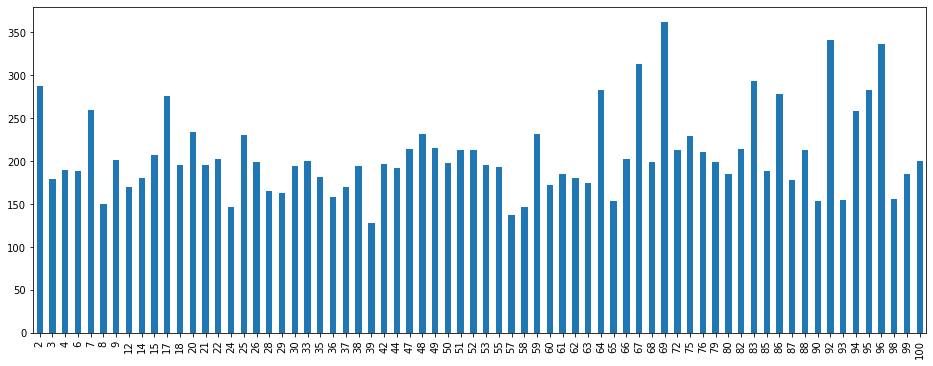

In [56]:
plt.figure(figsize=(16, 6))
cat.unit_number.value_counts().sort_index().plot(kind='bar')

No rare values

## NUMERICAL

### Null values

In [57]:
num.isna().sum().sort_values(ascending = False)

time_in_cycles    0
op_setting_1      0
sensor_20         0
sensor_17         0
sensor_15         0
sensor_14         0
sensor_13         0
sensor_12         0
sensor_11         0
sensor_9          0
sensor_8          0
sensor_7          0
sensor_6          0
sensor_4          0
sensor_3          0
sensor_2          0
op_setting_2      0
sensor_21         0
dtype: int64

### Outliers

#### Via standard deviation

##### Identify

###### Define number of standard deviations

We'll use 4σ as a conservative threshold for initial outlier detection. Future steps may refine this choice based on exploration or model feedback. 
- In a normal distribution, ~99.99% of values fall within ±4 standard deviations.
- The 4σ rule is a safe and conservative way to detect only the most extreme values, **even if the data isn’t perfectly normal** — it's good enough for early outlier detection without overcomplicating things.

In [58]:
std_dev_num = 4

###### Function to return outliers indexes

In [59]:
def outliers_std_dev(variable, std_dev_num = 4):
    # drop null values
    variable = variable.dropna()
    # calculate limits
    mean = np.mean(variable)
    std_dev = np.std(variable)
    threshold = std_dev * std_dev_num
    lower_limit = mean - threshold
    upper_limit = mean + threshold
    # find indexes of values that are outside the limits
    indexes = [index for index,value in variable.items() if value < lower_limit or value > upper_limit]
    return(indexes)

###### Function to get value counts (for summary)

In [60]:
def outlier_counts(num, variable, std_dev_num = 4):
    outliers = outliers_std_dev(num[variable], std_dev_num)
    return(num.loc[outliers,variable].value_counts())

###### Variables to analize

In [61]:
outlier_variables = num.columns.to_list()

###### Apply

We'll use the function outlier_locations because we are working with time series.

In [62]:
for variable in outlier_variables:
    print('\n' + variable + ':\n')
    print(outlier_counts(num,variable,std_dev_num=4))


time_in_cycles:

Series([], Name: time_in_cycles, dtype: int64)

op_setting_1:

Series([], Name: op_setting_1, dtype: int64)

op_setting_2:

Series([], Name: op_setting_2, dtype: int64)

sensor_2:

Series([], Name: sensor_2, dtype: int64)

sensor_3:

1616.91    1
Name: sensor_3, dtype: int64

sensor_4:

Series([], Name: sensor_4, dtype: int64)

sensor_6:

21.6    279
Name: sensor_6, dtype: int64

sensor_7:

549.85    1
Name: sensor_7, dtype: int64

sensor_8:

2388.44    2
2388.50    1
2388.52    1
2388.46    1
2388.56    1
Name: sensor_8, dtype: int64

sensor_9:

9175.36    2
9159.03    2
9157.23    2
9174.31    1
9175.16    1
          ..
9170.17    1
9171.68    1
9174.90    1
9178.75    1
9215.59    1
Name: sensor_9, Length: 177, dtype: int64

sensor_11:

Series([], Name: sensor_11, dtype: int64)

sensor_12:

Series([], Name: sensor_12, dtype: int64)

sensor_13:

2388.39    2
2388.44    1
2388.56    1
2388.55    1
2388.49    1
2388.54    1
Name: sensor_13, dtype: int64

sensor_14:



###### Better visualization:

In [63]:
outlier_summary = {
    var: outlier_count(num, var, std_dev_num=4).sum()
    for var in num.columns
}

pd.Series(outlier_summary).sort_values(ascending=False)

sensor_6          279
sensor_9          180
sensor_14         167
sensor_13           7
sensor_8            6
sensor_3            1
sensor_7            1
sensor_12           0
sensor_20           0
sensor_17           0
sensor_15           0
time_in_cycles      0
sensor_11           0
op_setting_1        0
sensor_4            0
sensor_2            0
op_setting_2        0
sensor_21           0
dtype: int64

Let's plot them over time to investigate if they are random spikes or trends

Outliers near the end? sensor rising/falling before failure?)

Does sensor_6 spike before failure for all engines, or just a few?

**Let's investigate sensor 6:**

/Users/rober/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


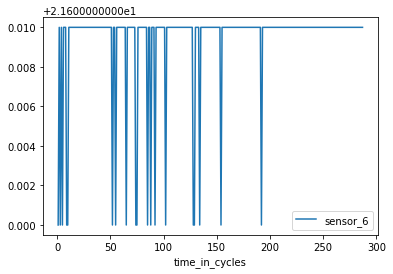

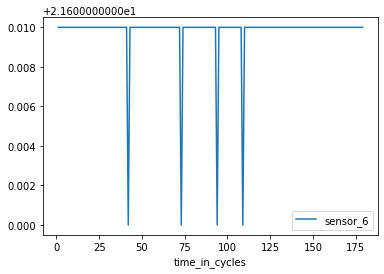

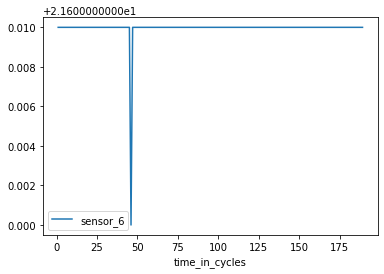

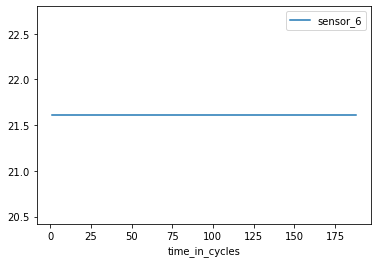

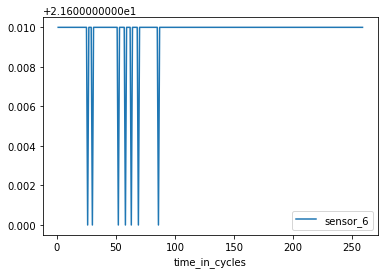

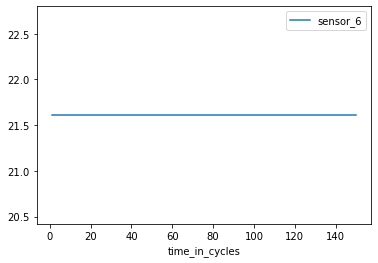

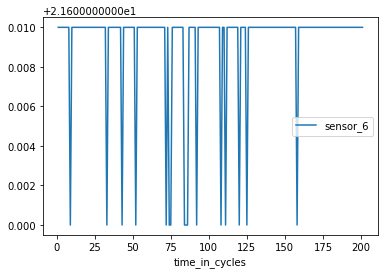

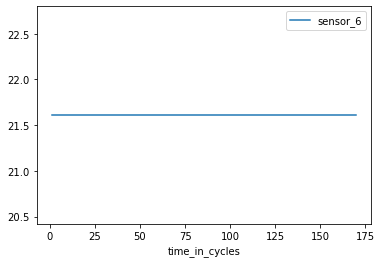

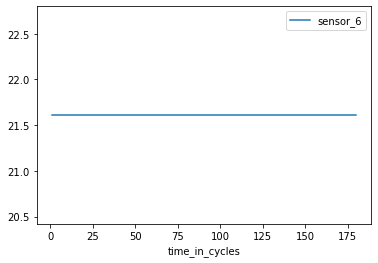

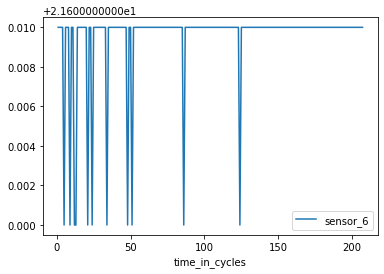

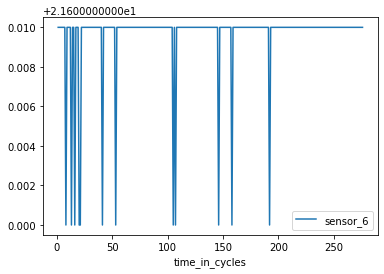

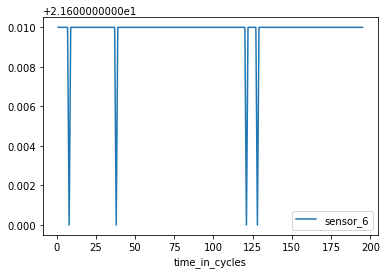

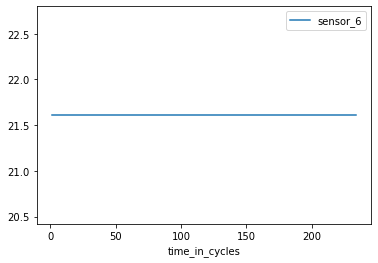

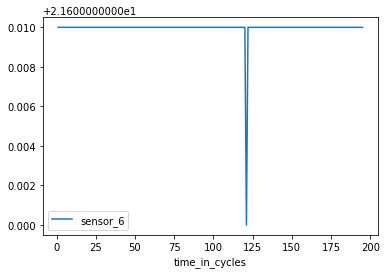

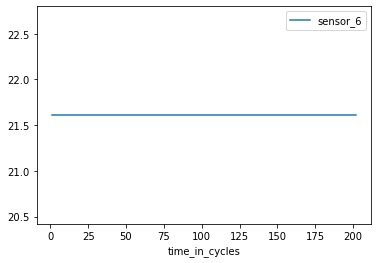

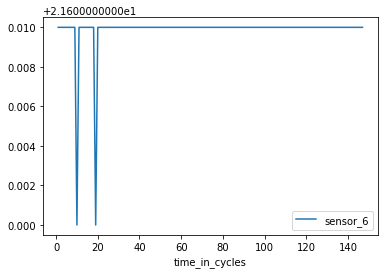

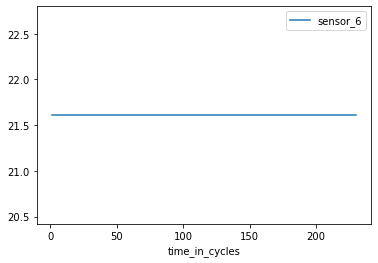

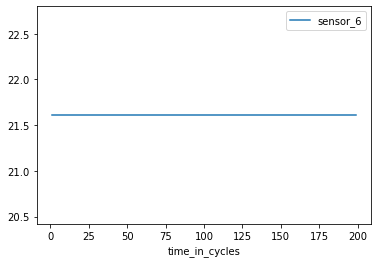

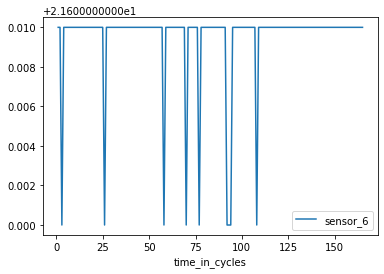

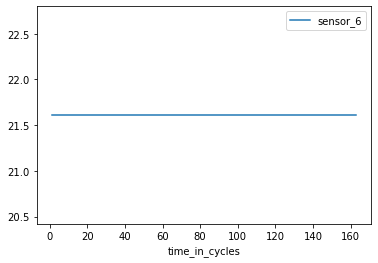

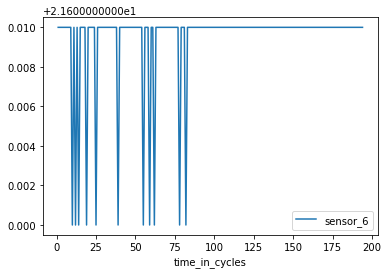

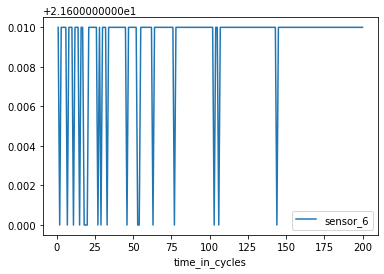

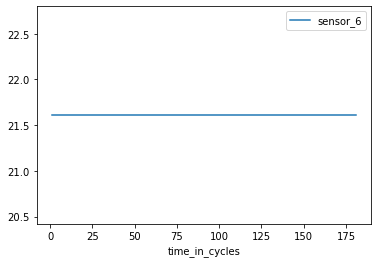

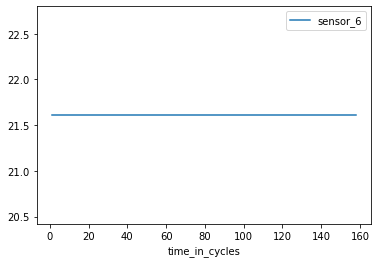

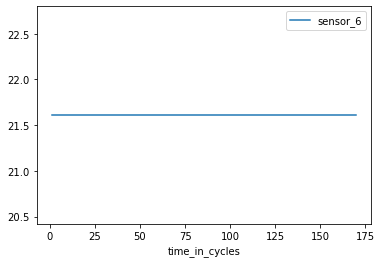

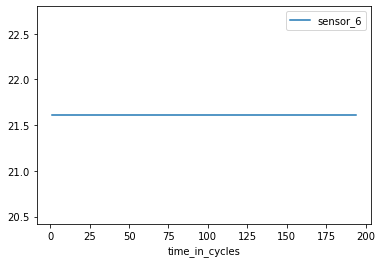

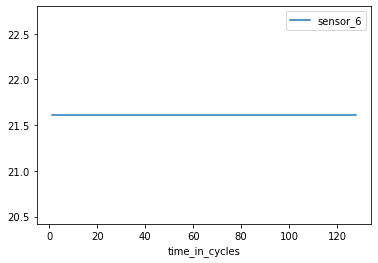

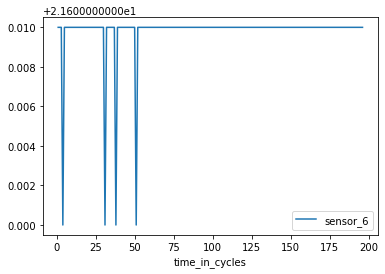

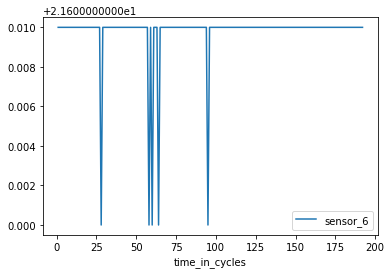

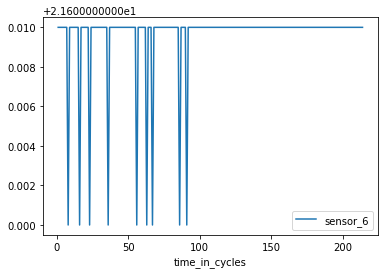

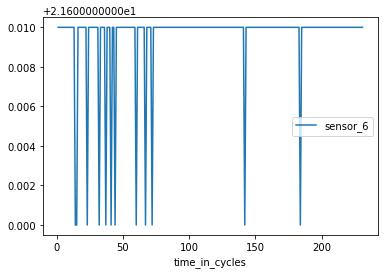

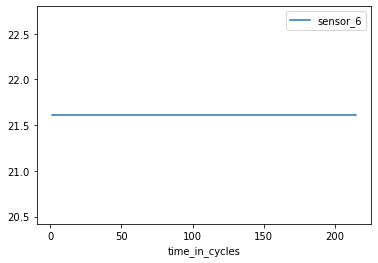

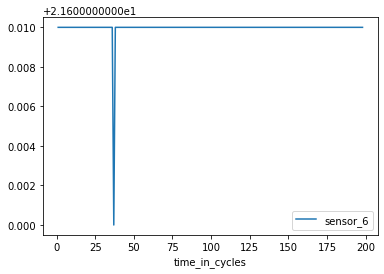

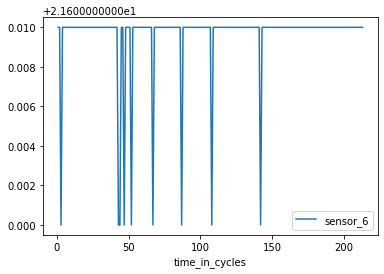

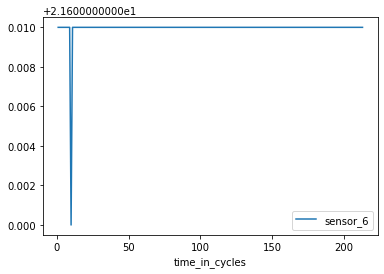

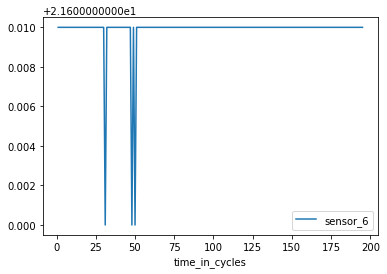

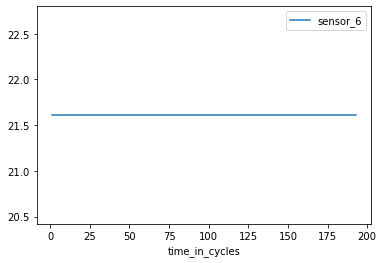

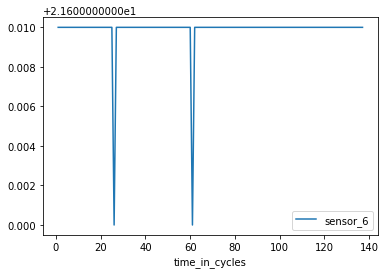

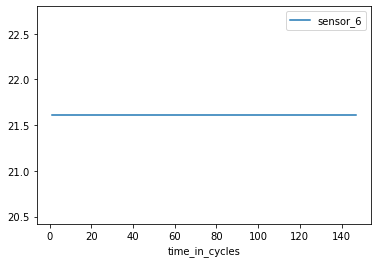

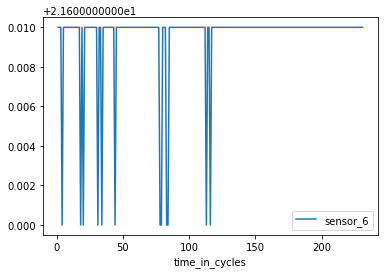

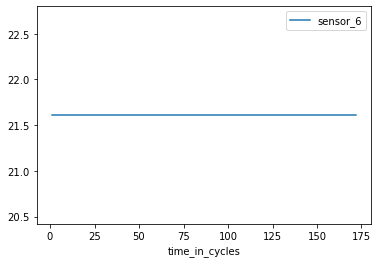

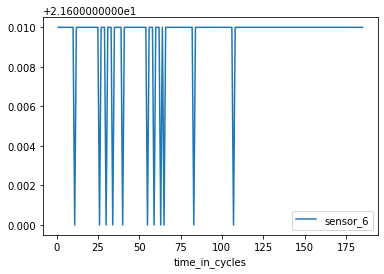

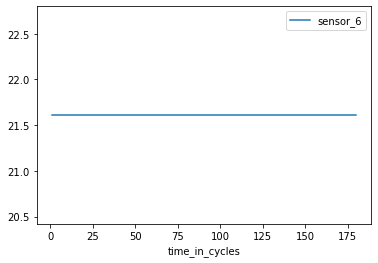

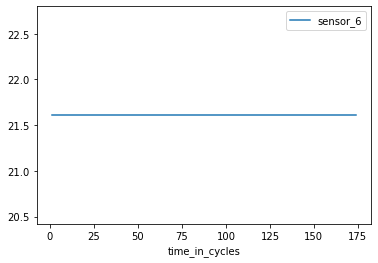

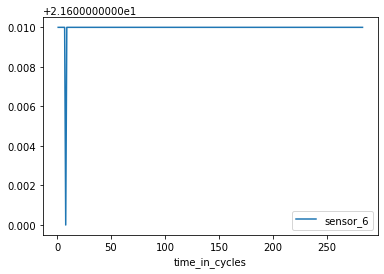

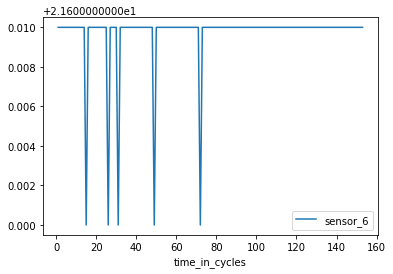

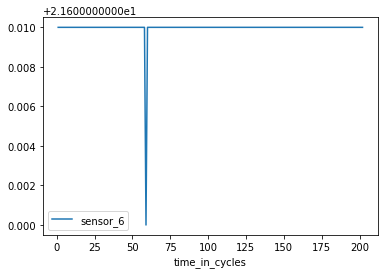

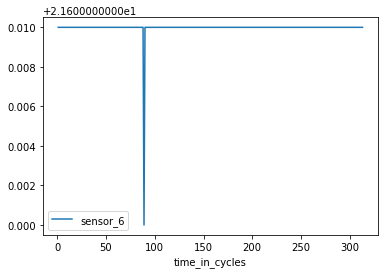

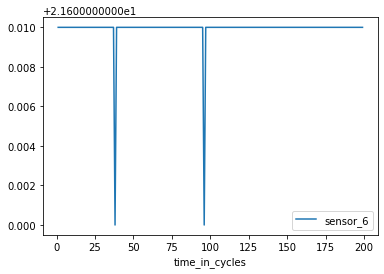

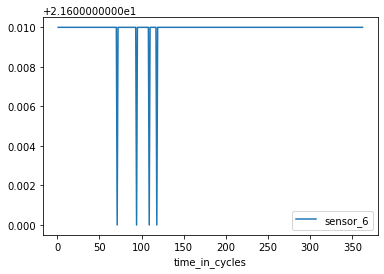

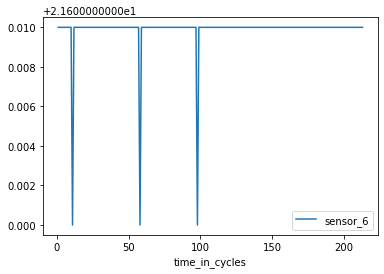

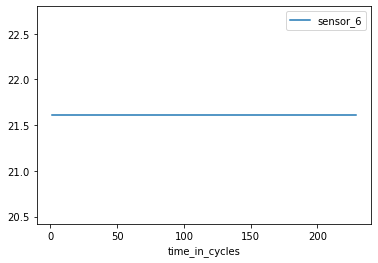

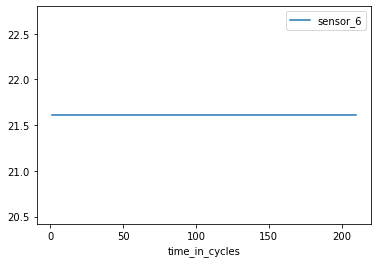

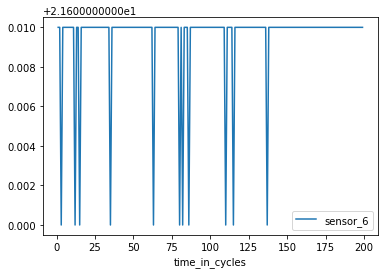

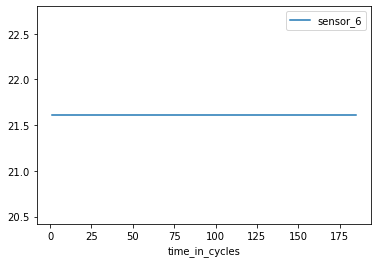

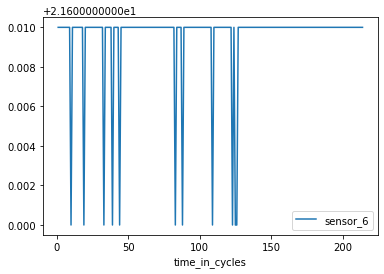

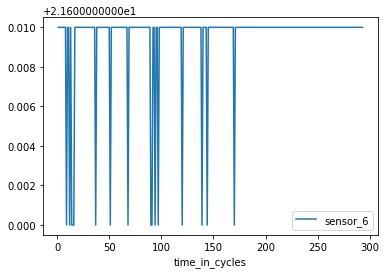

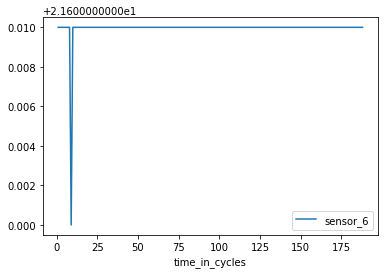

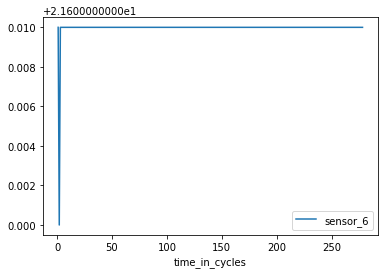

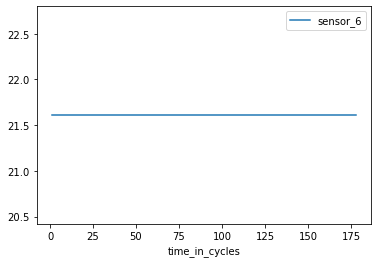

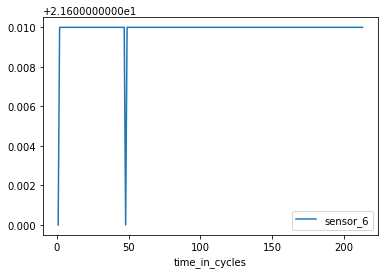

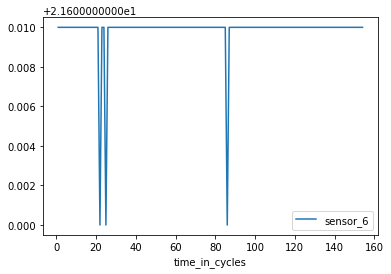

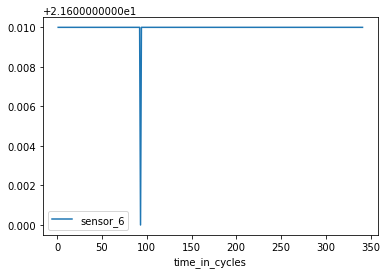

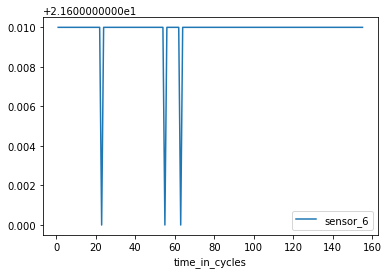

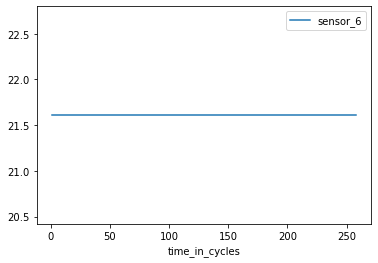

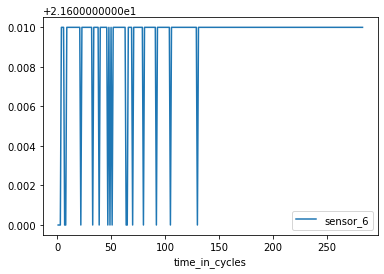

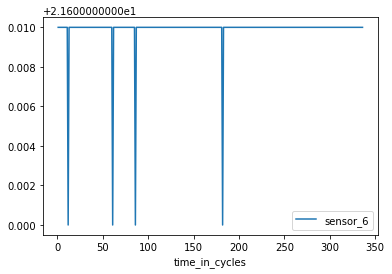

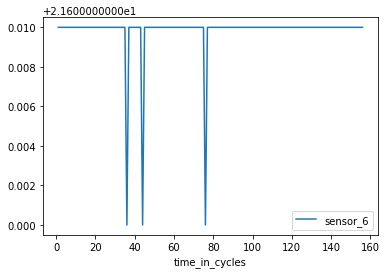

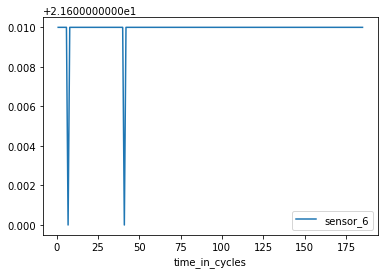

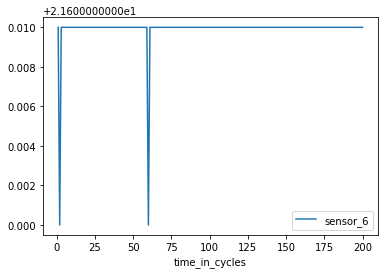

In [36]:
for unit in df_work['unit_number'].unique():
    df_work[df_work['unit_number'] == unit][['time_in_cycles', 'sensor_6']].plot(x='time_in_cycles', y='sensor_6')

**SENSOR 6**

Consistent pattern across engines:
- Almost every engine holds a constant value of 21.6
- ⚠️ **In many units, there are spikes downward, often very sudden**
- In others, the signal is perfectly flat with no anomalies

Interpretation: 
- These drops are not random noise. They are systematic, visible in many units.
- Always drop below the constant value, not above
- 👶 **Mostly in the early to mid part of the engine's life, often starting with a dip near cycle 0.**

These drops may relate to:
- **A sensor error**
- **Early signs of engine degradation**
- **Operational fault or shutdown signal**

👉🏻 **ACTION: Create a new variable: binary flag sensor_6_drop** and keep sensor_6 as-is for now.
- We'll include it in the notebook dedicated to transforming variables to keep the same scheme as other projects:
- *df_work['sensor_6_drop'] = (df_work['sensor_6'] < 21).astype(int)*

**Let's investigate sensor_9**

/Users/rober/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


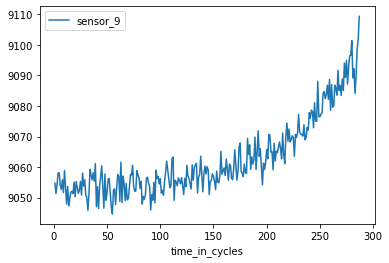

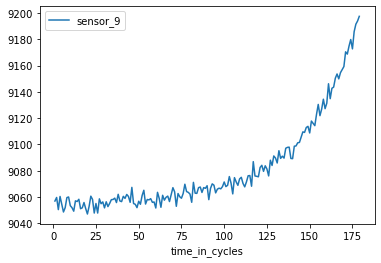

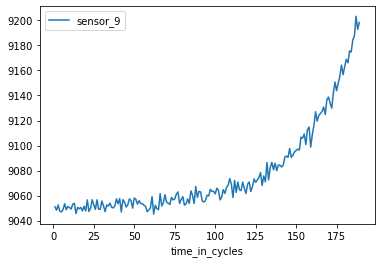

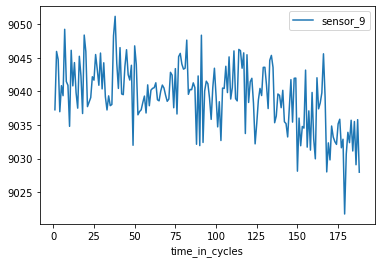

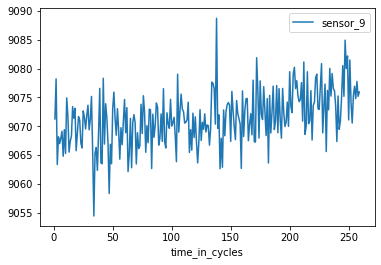

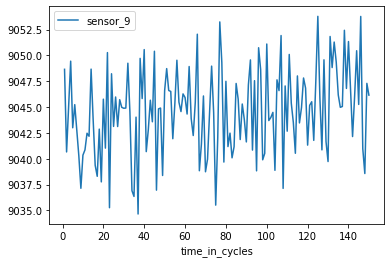

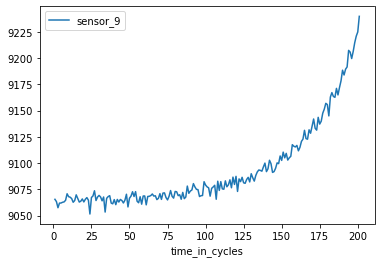

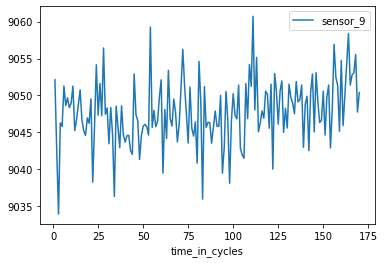

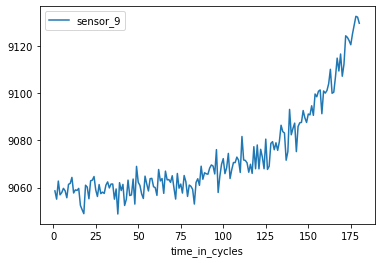

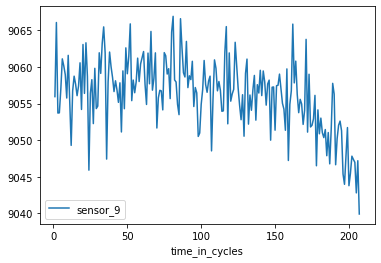

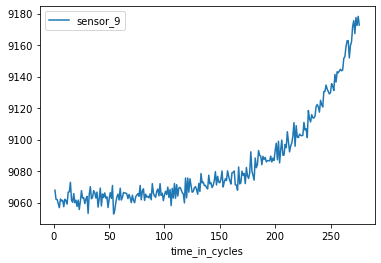

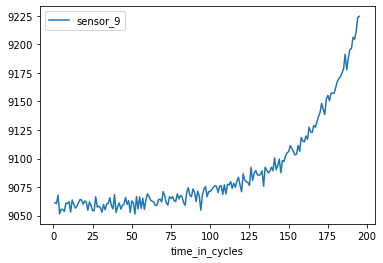

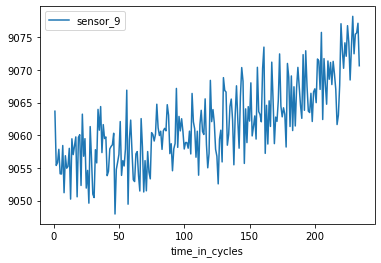

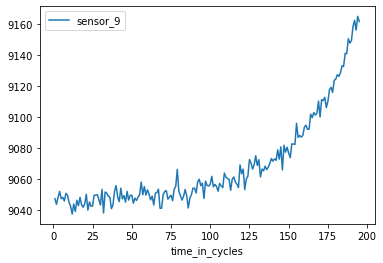

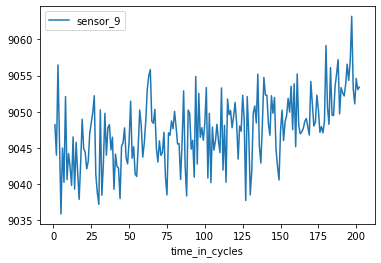

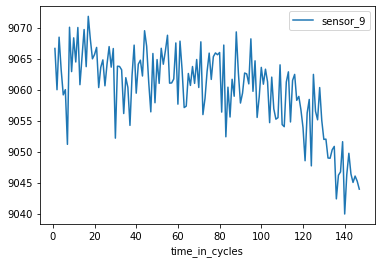

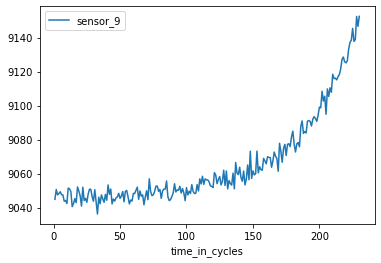

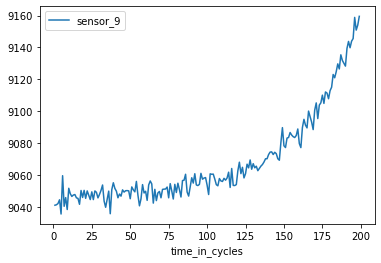

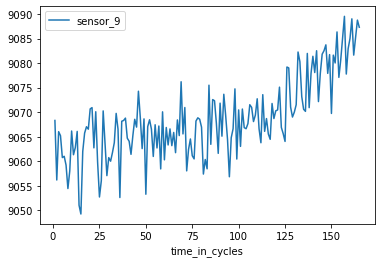

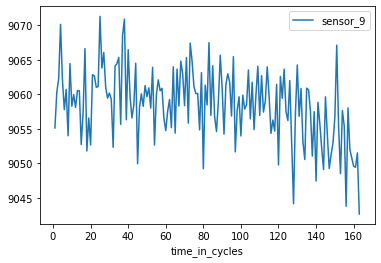

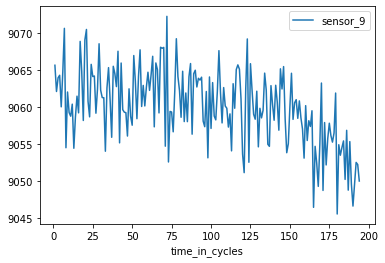

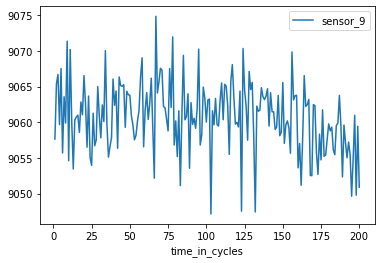

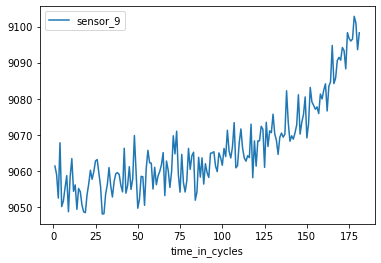

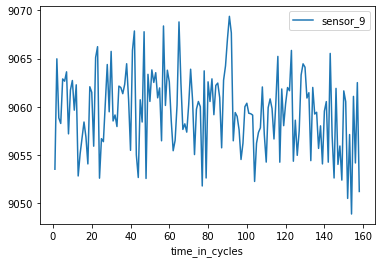

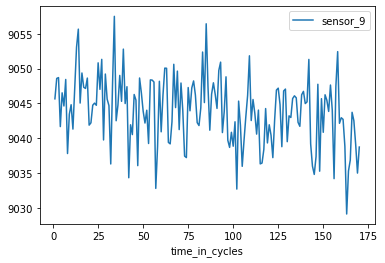

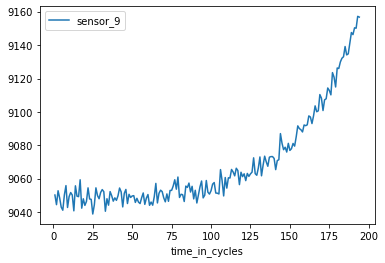

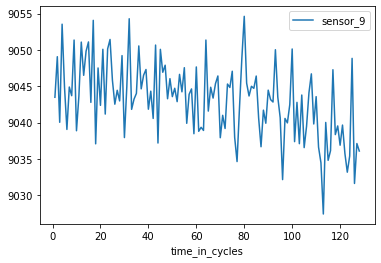

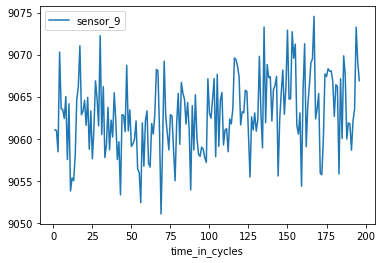

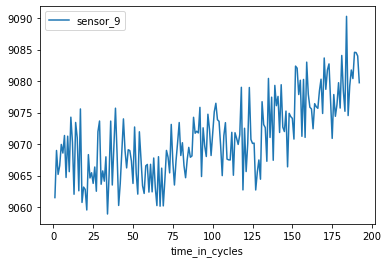

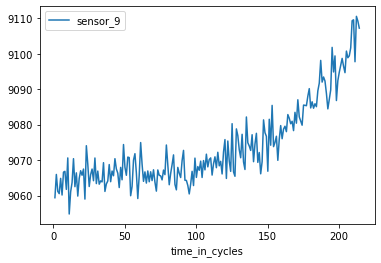

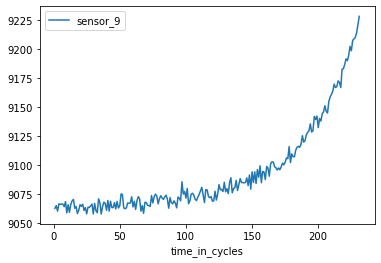

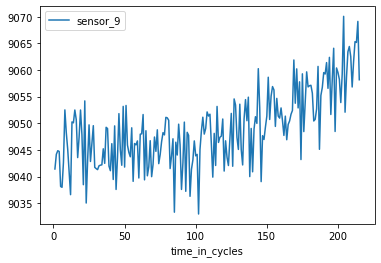

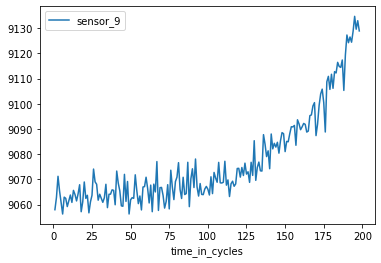

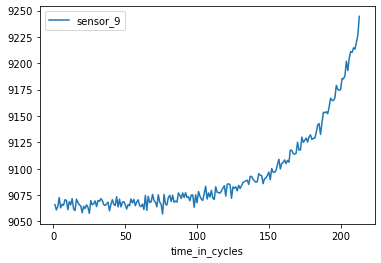

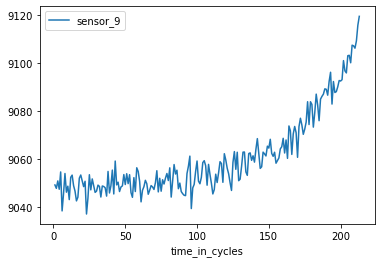

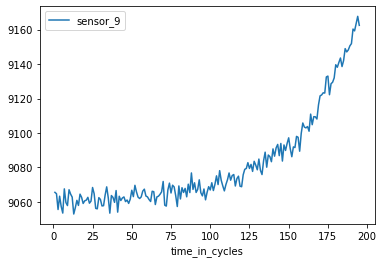

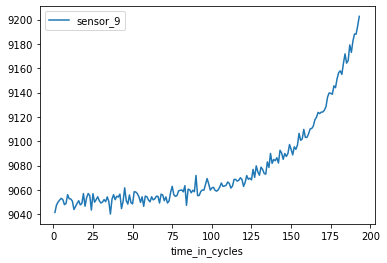

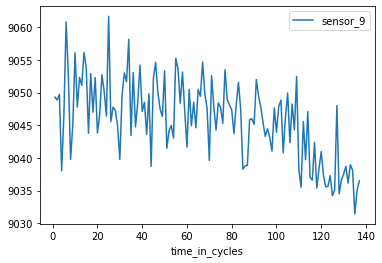

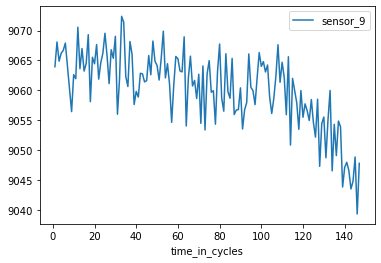

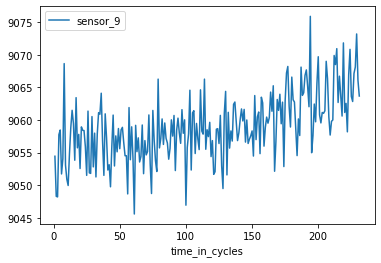

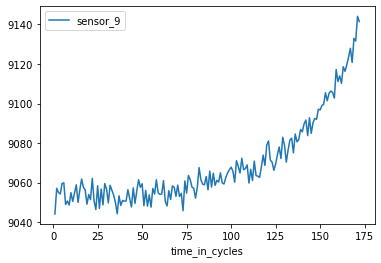

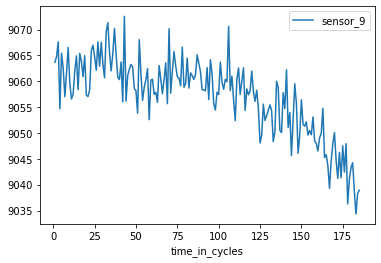

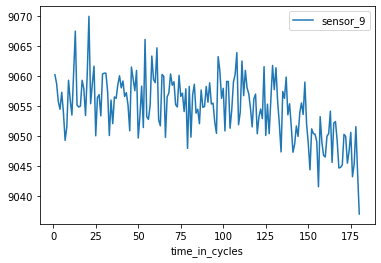

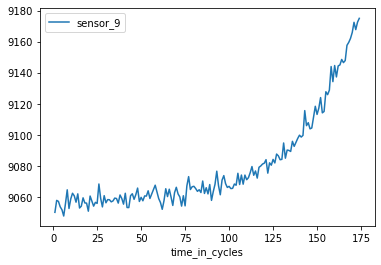

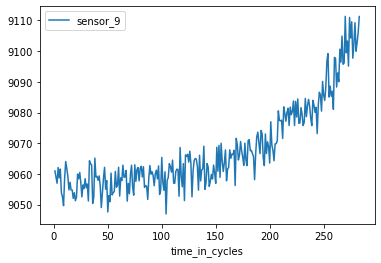

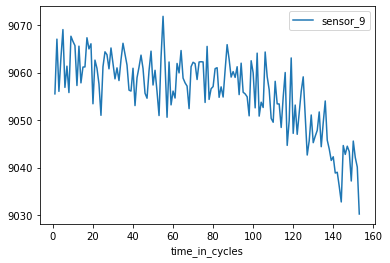

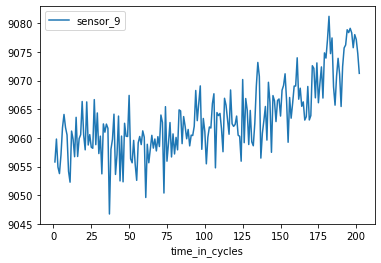

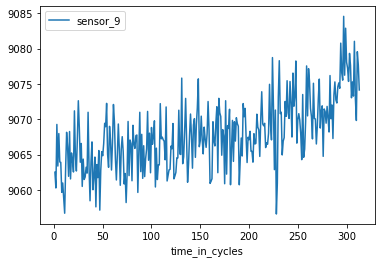

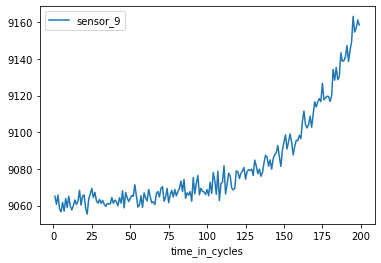

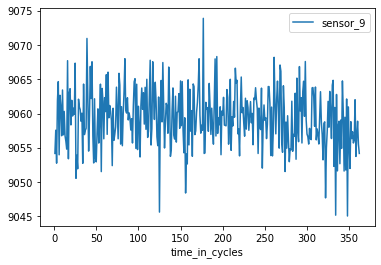

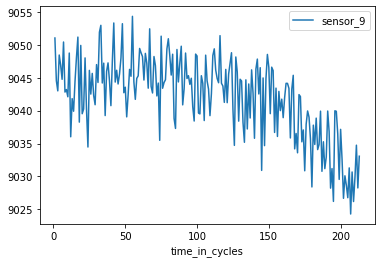

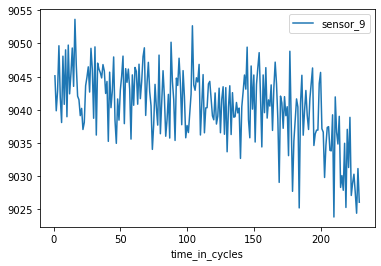

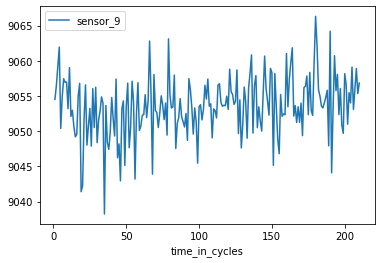

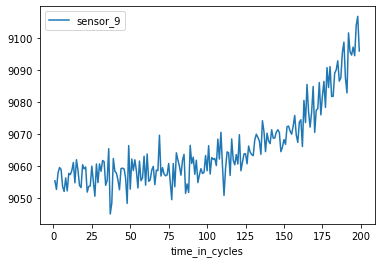

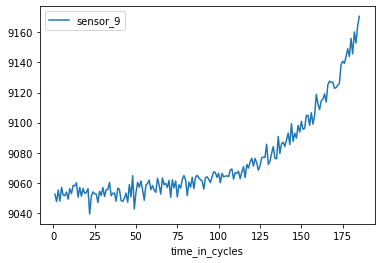

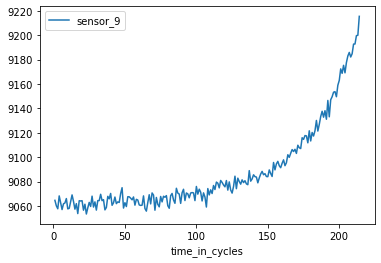

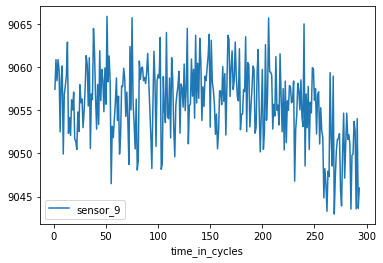

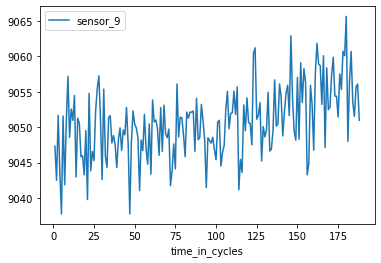

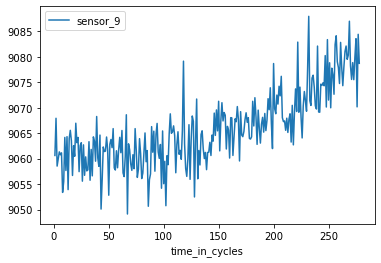

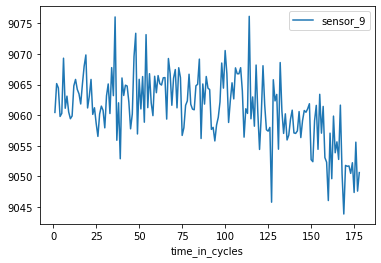

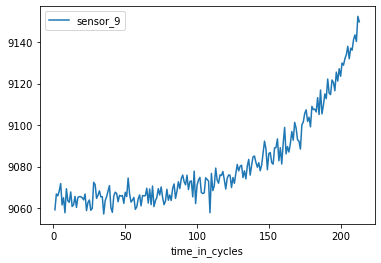

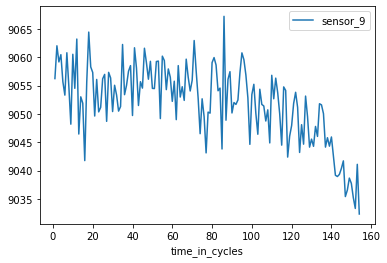

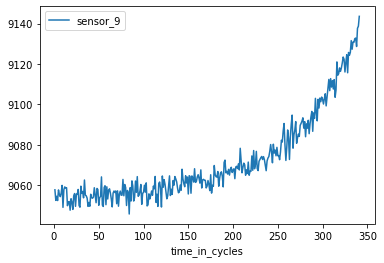

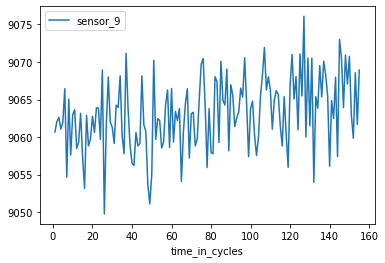

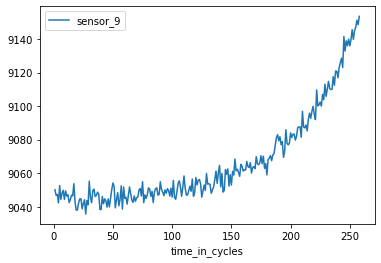

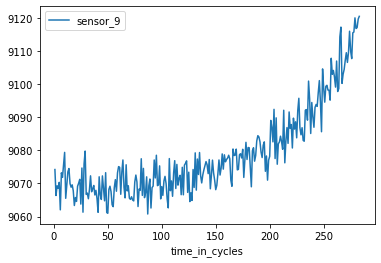

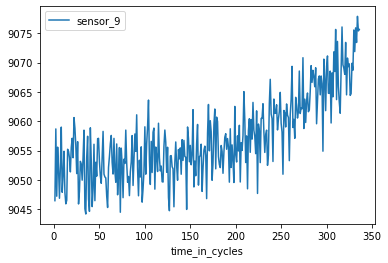

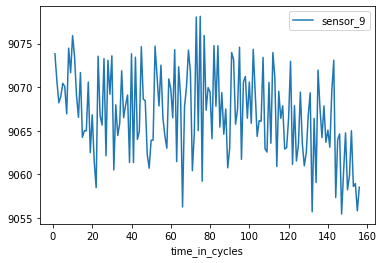

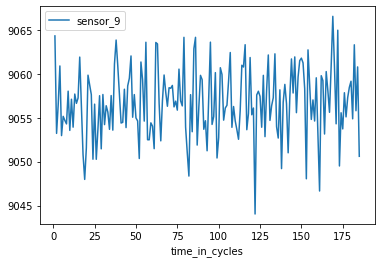

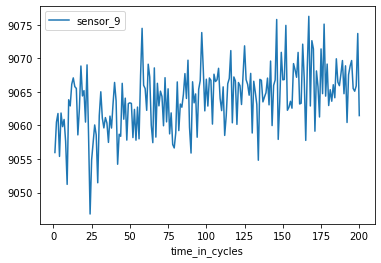

In [68]:
for unit in df_work['unit_number'].unique():
    df_work[df_work['unit_number'] == unit][['time_in_cycles', 'sensor_9']].plot(x='time_in_cycles', y='sensor_9')

**SENSOR 9**

✅ **No errors: High outlier count reflects different degradation paths, not bad data.**

Although sensor_9 was flagged with 180 outliers using the global standard deviation method, a deeper inspection of its time series behavior across units shows that:

- Each engine unit exhibits a smooth and consistent trend in sensor_9. 

- There are no signs of erratic jumps, noise, or measurement faults in the sensor values.

- The apparent "outliers" result from applying a global threshold (mean ± 4×std) across all units, despite the fact that different engines have naturally different operating ranges for this sensor. 

- The fact that sensor_9 behaves differently isn’t a problem — it’s realistic engine behavior. And understanding that variation is key to building a strong RUL prediction model.

We'll keep as-is. Model-specific handling (e.g., trend features or per-unit normalization) may be applied later.

**Let's investigate sensor 14**

/Users/rober/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


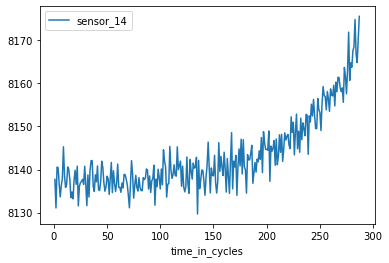

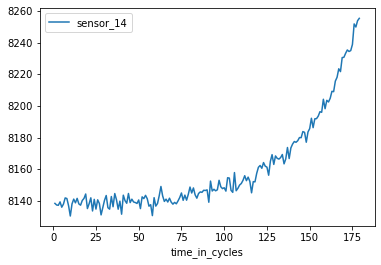

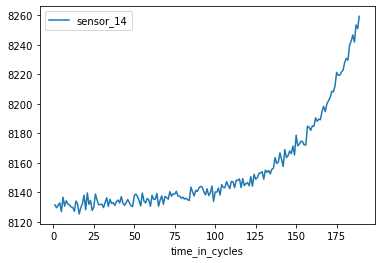

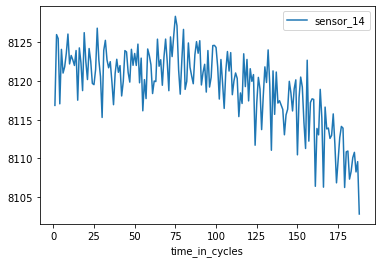

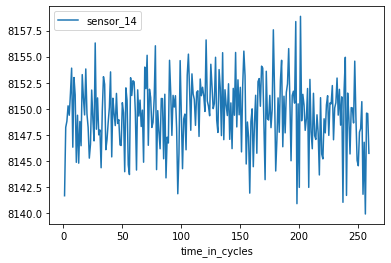

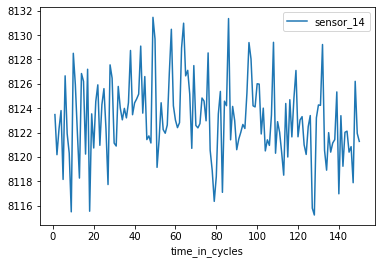

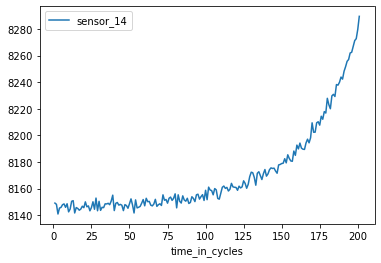

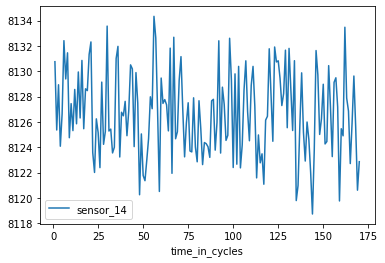

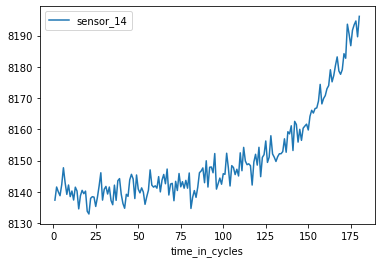

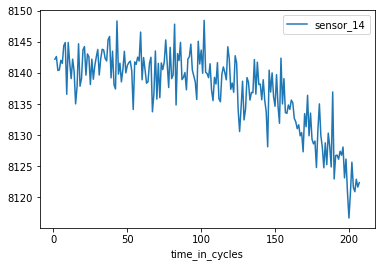

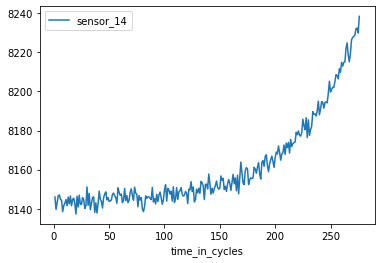

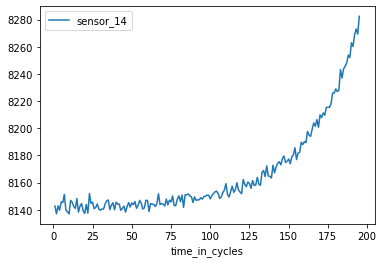

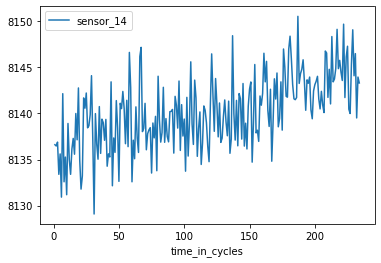

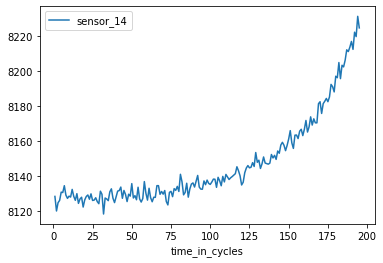

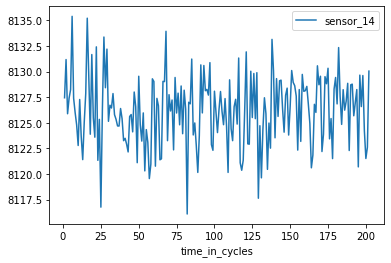

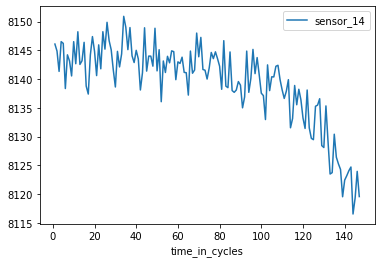

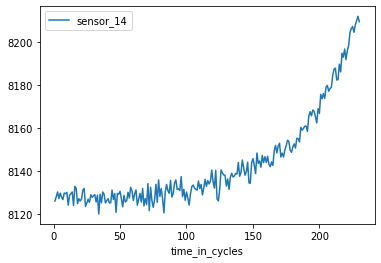

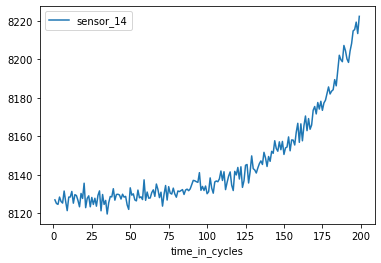

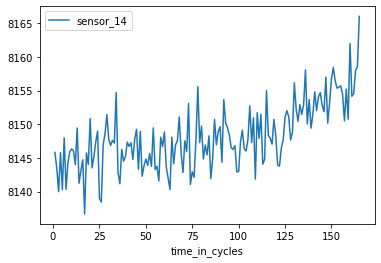

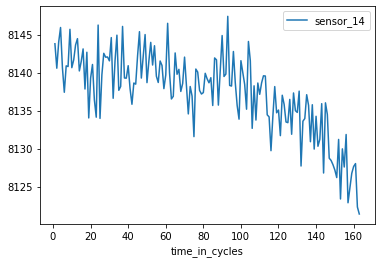

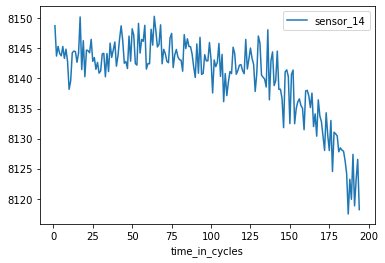

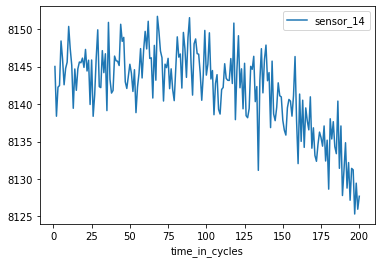

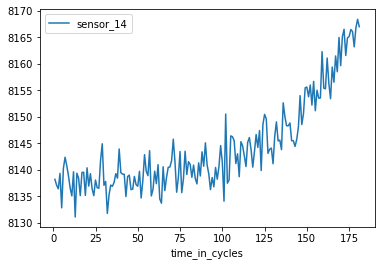

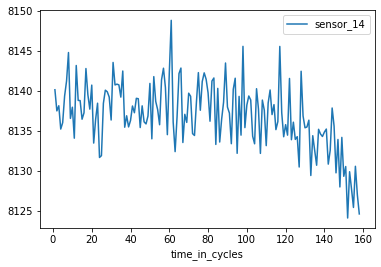

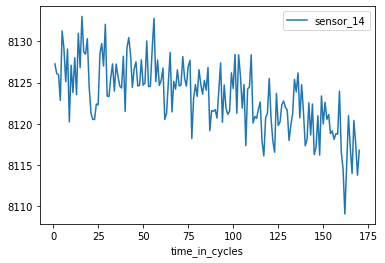

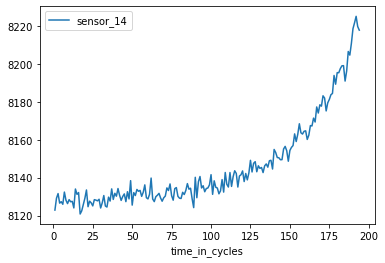

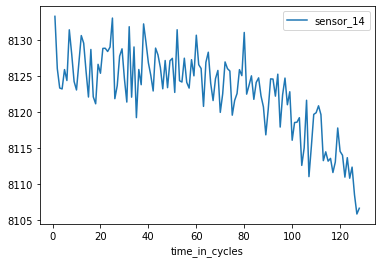

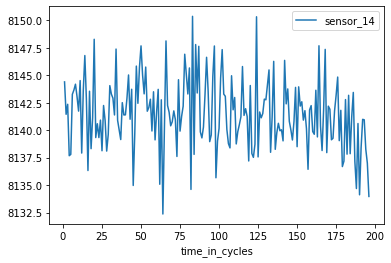

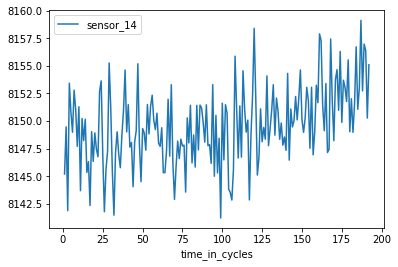

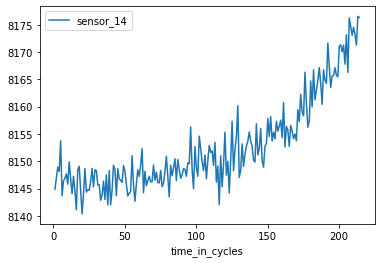

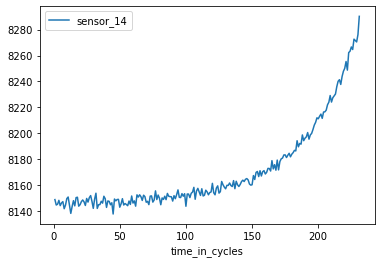

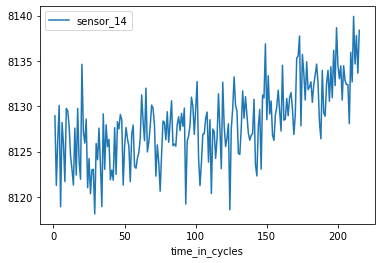

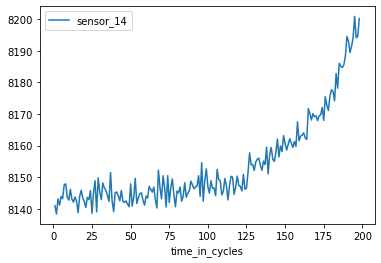

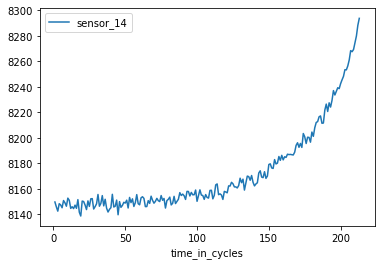

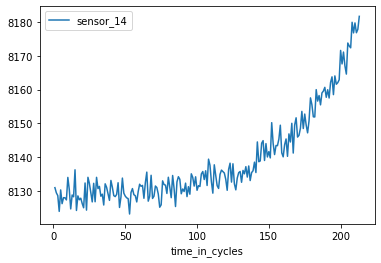

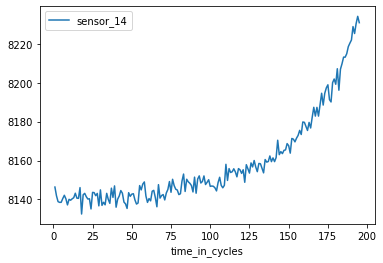

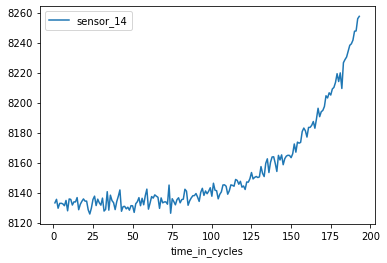

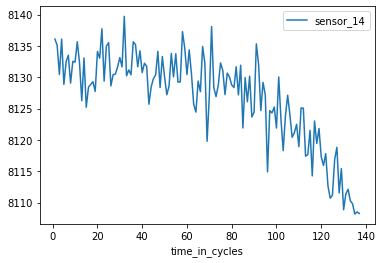

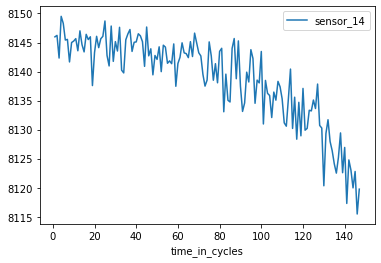

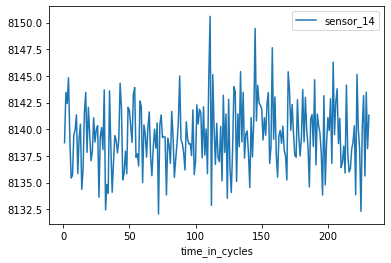

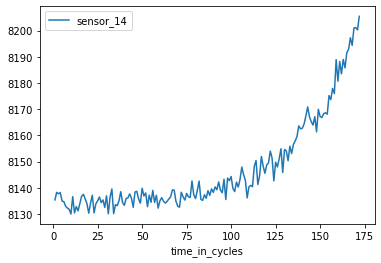

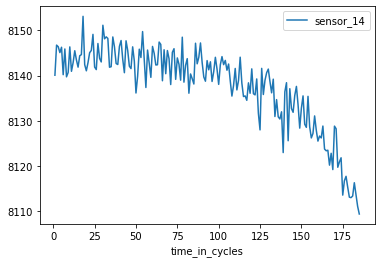

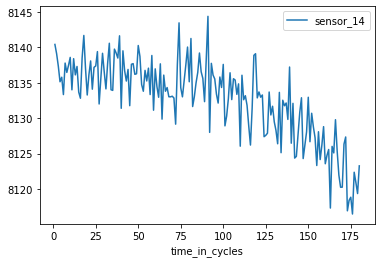

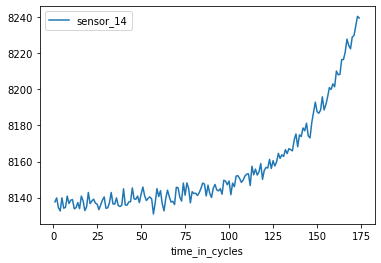

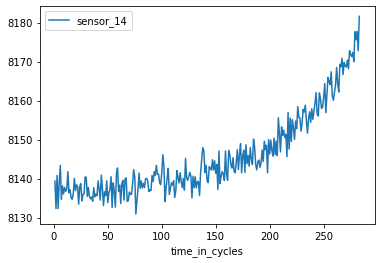

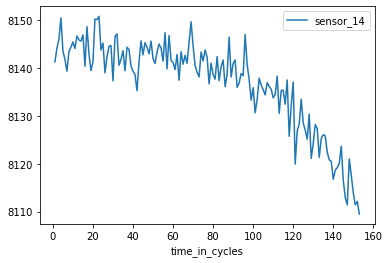

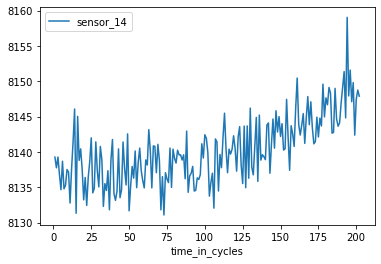

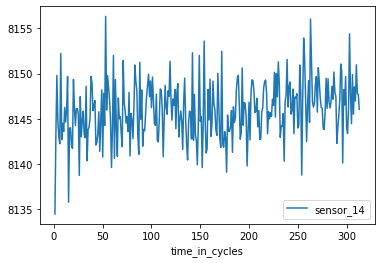

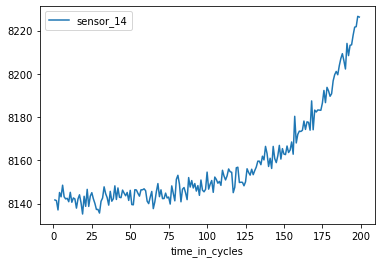

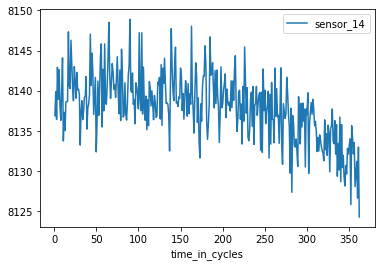

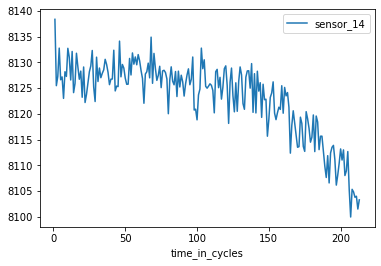

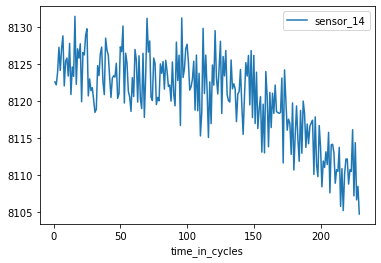

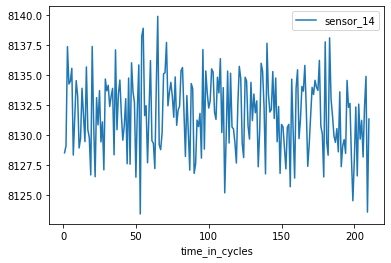

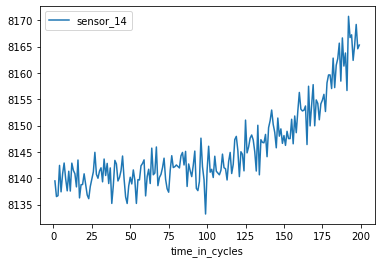

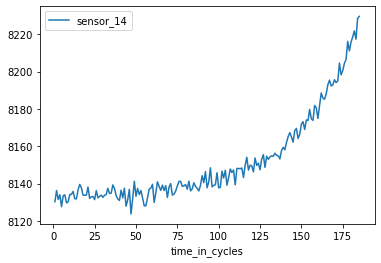

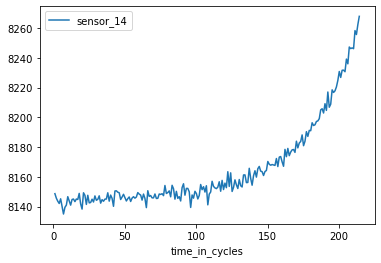

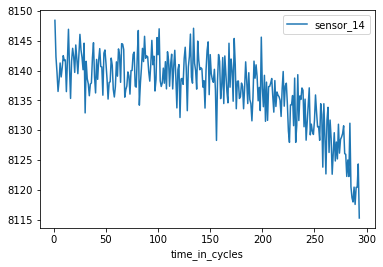

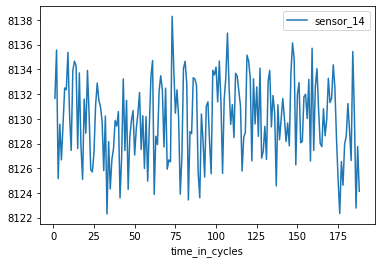

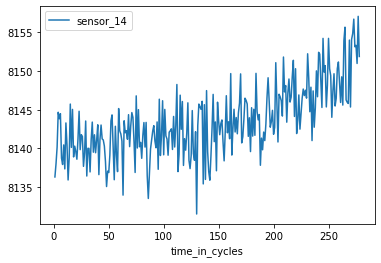

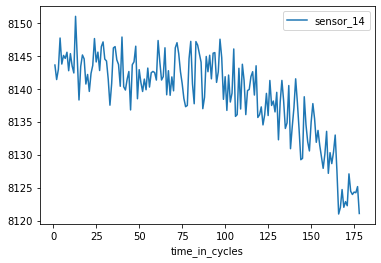

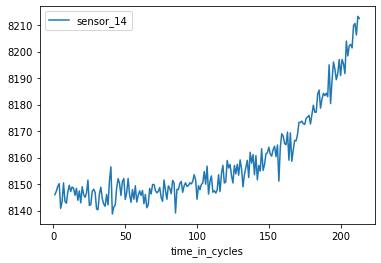

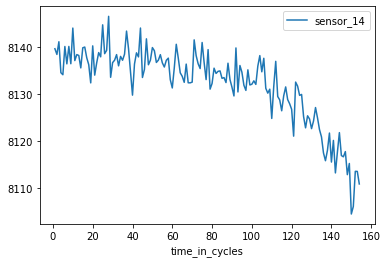

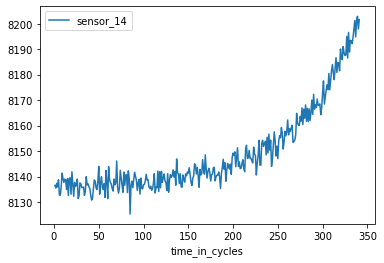

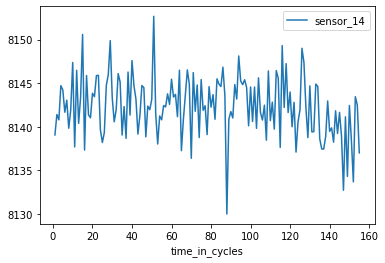

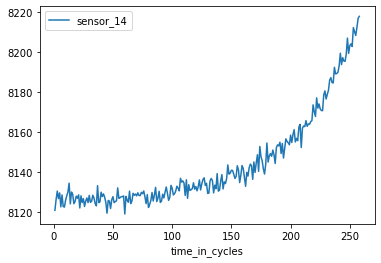

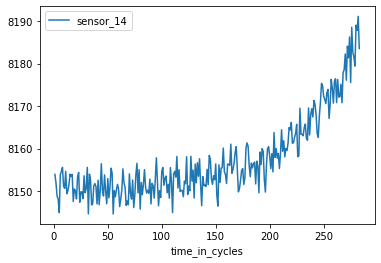

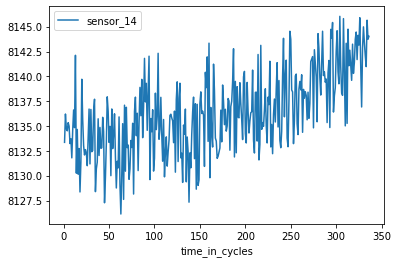

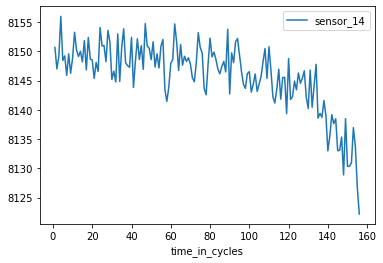

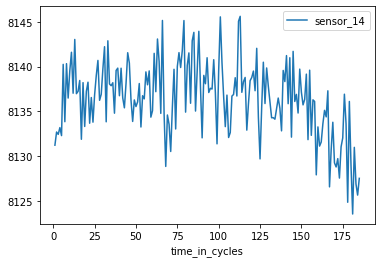

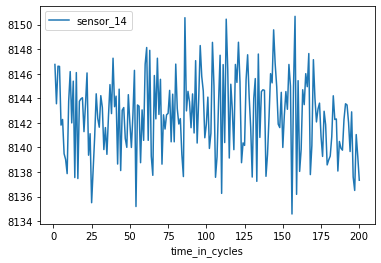

In [70]:
for unit in df_work['unit_number'].unique():
    df_work[df_work['unit_number'] == unit][['time_in_cycles', 'sensor_14']].plot(x='time_in_cycles', y='sensor_14')

**SENSOR 14**

✅ Same as sensor 9: No errors or inconsistencies found. High outlier count reflects different degradation paths, not bad data.

We'll keep as-is. Model-specific handling (e.g., trend features or per-unit normalization) may be applied later.

**GENERAL CONCLUSION**

- These three sensors with many outliers are not "dirty" — they carry degradation signals in different forms.
- Outlier detection revealed variation, not errors — so no values are removed or corrected now.

We've also investigated the rest of sensors with outliers

- sensor_13: 7
- sensor_8: 6
- sensor_3: 1
- sensor_7: 1

... And had the same natural variations corresponding to physical degradation — normal in predictive maintenance.

Eg. Sensor 13:

/Users/rober/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


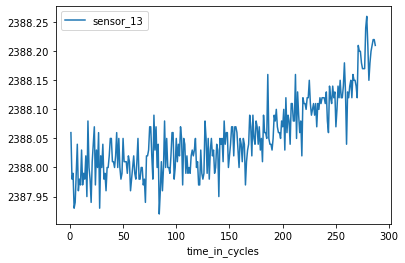

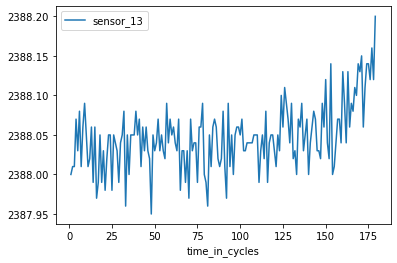

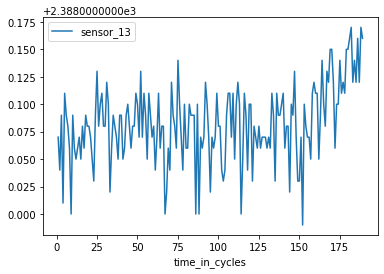

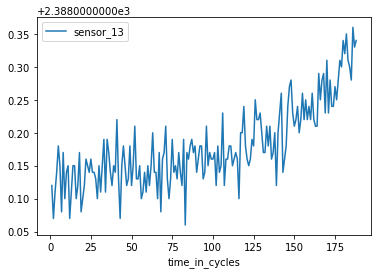

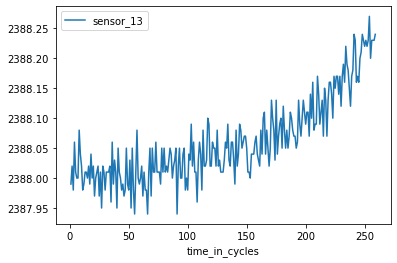

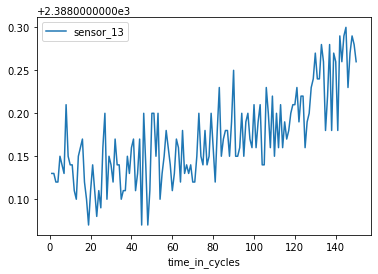

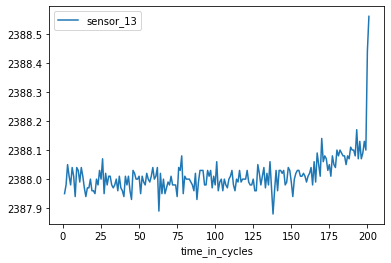

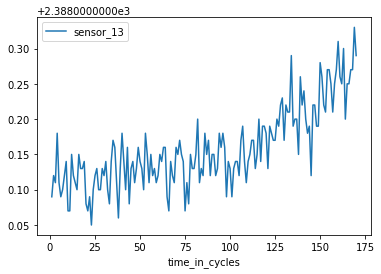

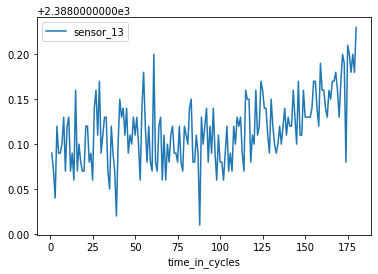

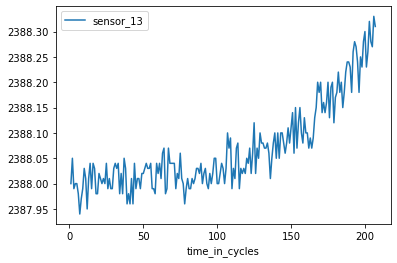

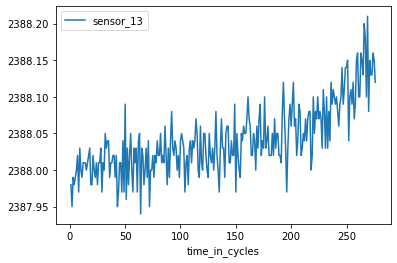

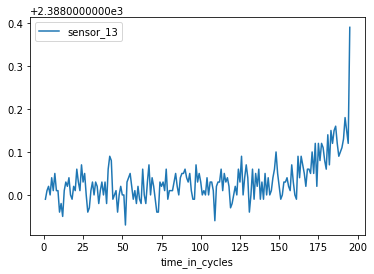

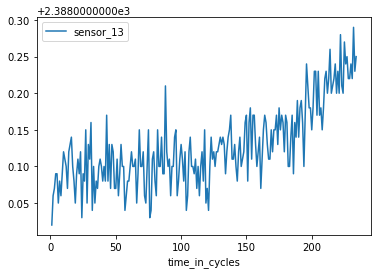

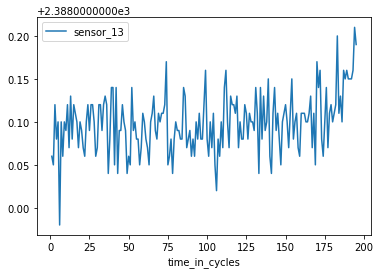

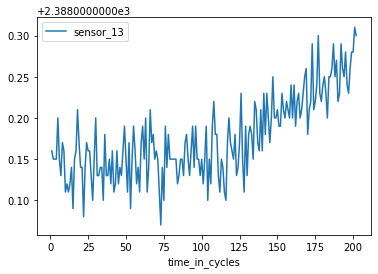

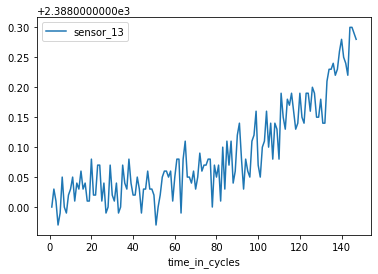

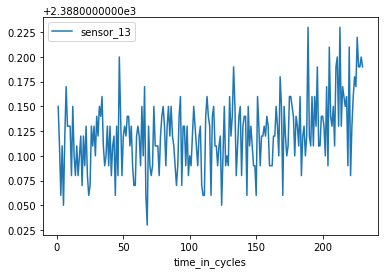

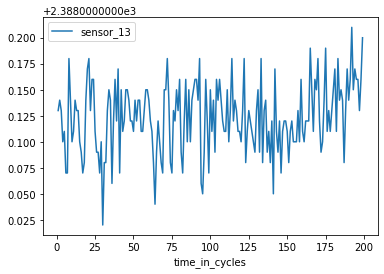

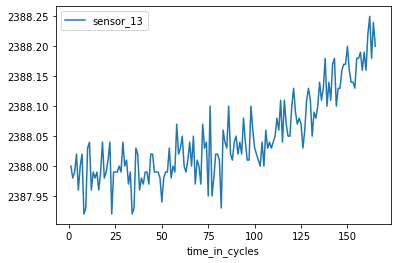

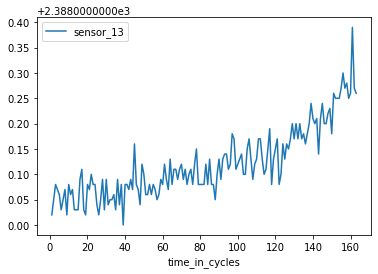

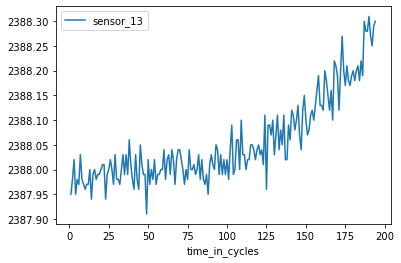

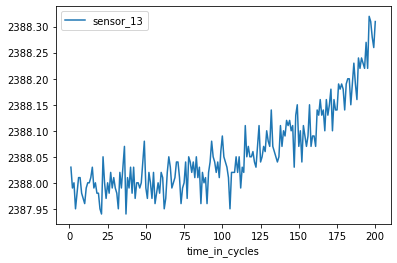

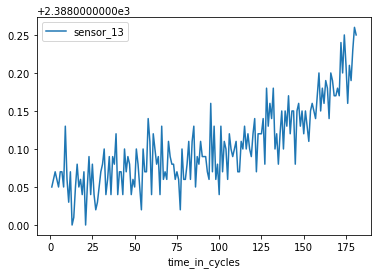

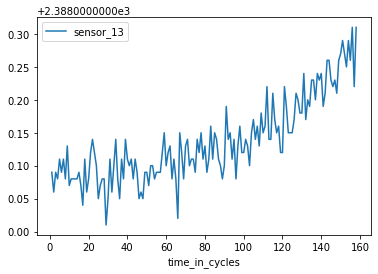

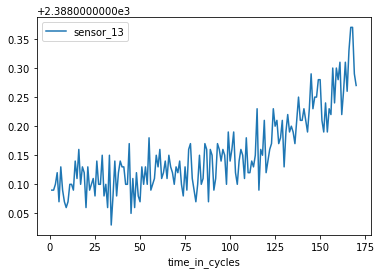

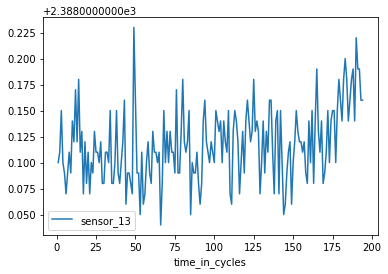

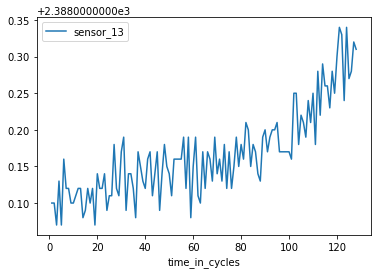

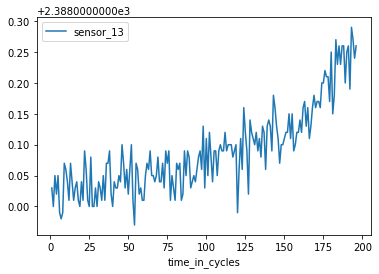

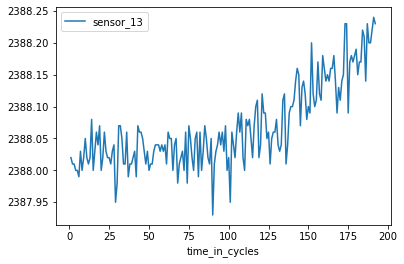

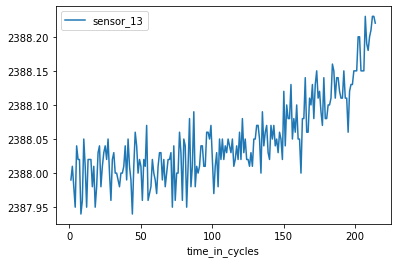

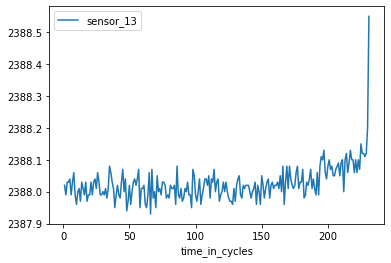

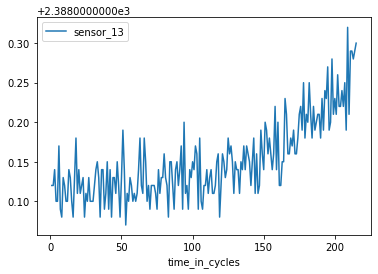

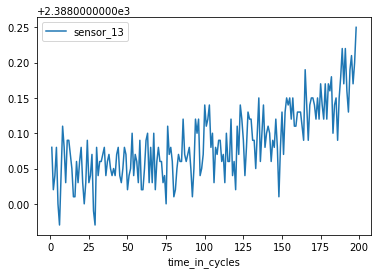

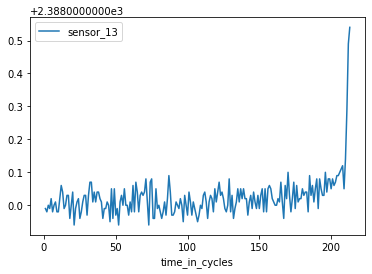

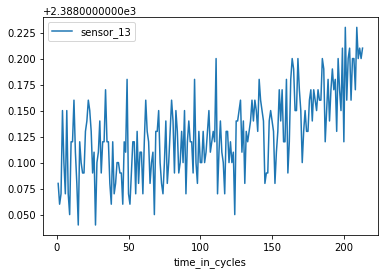

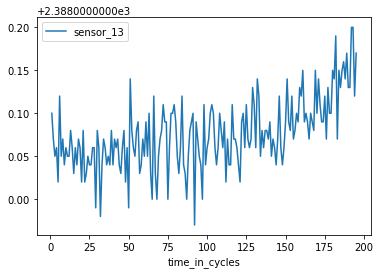

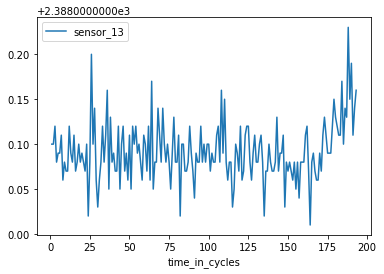

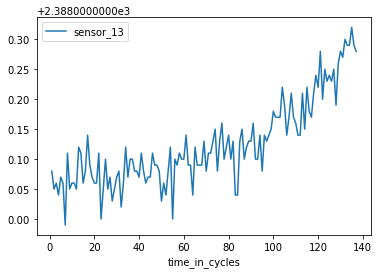

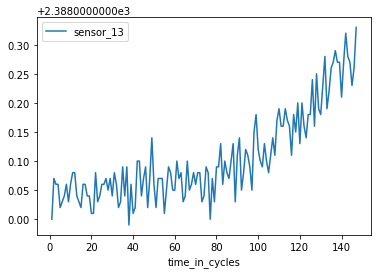

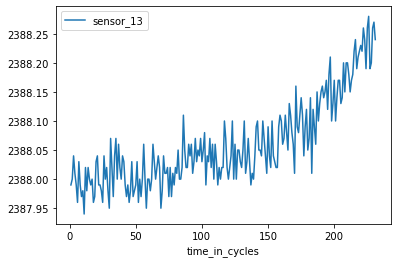

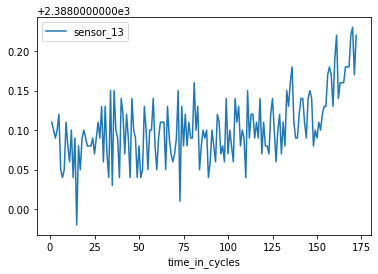

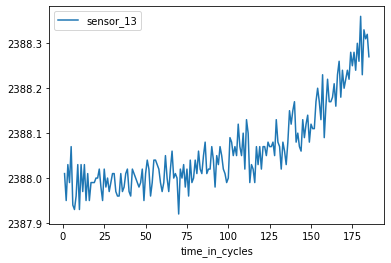

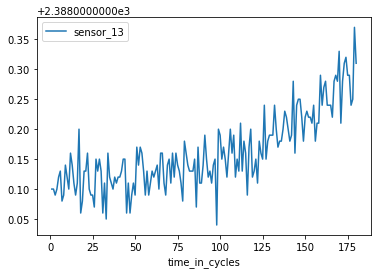

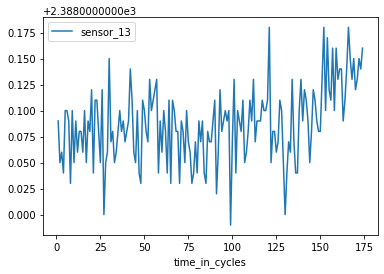

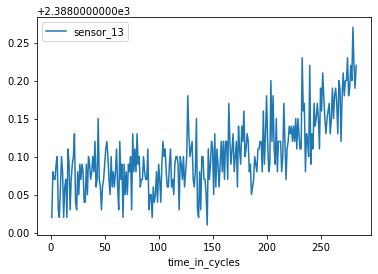

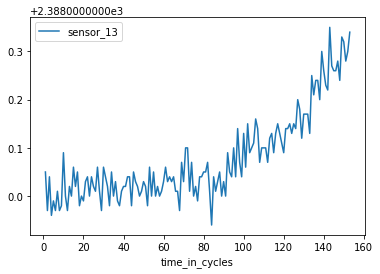

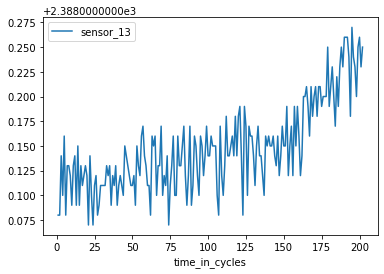

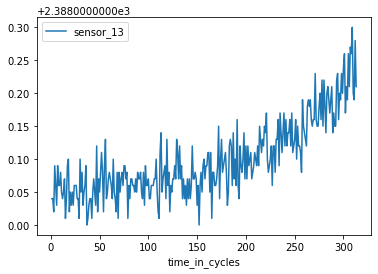

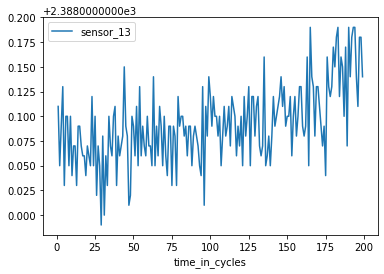

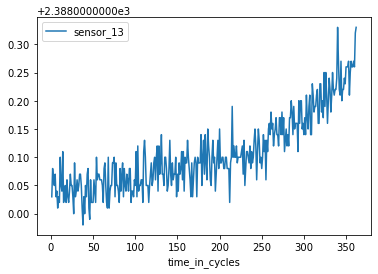

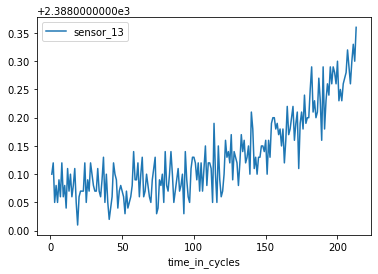

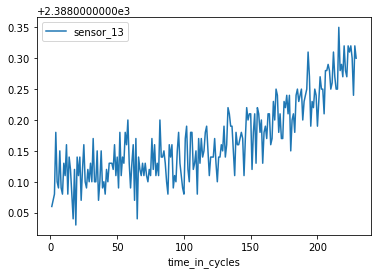

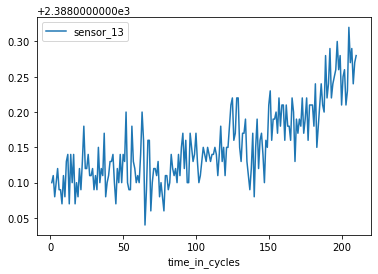

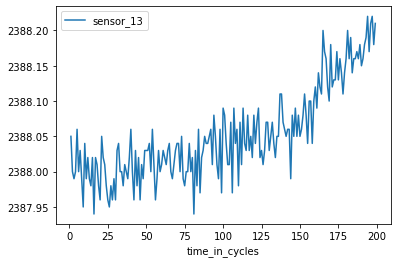

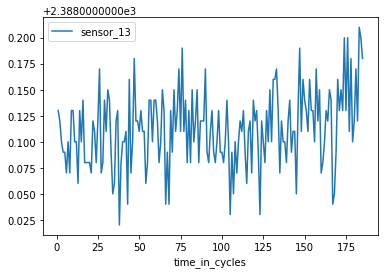

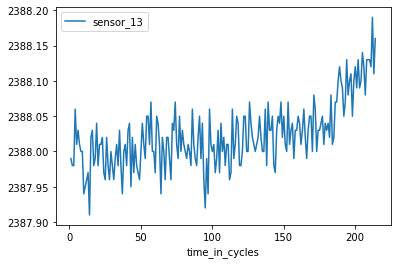

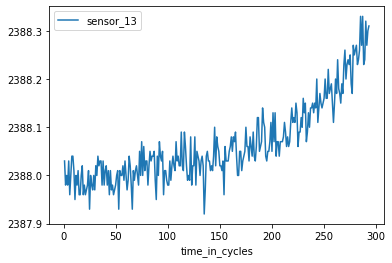

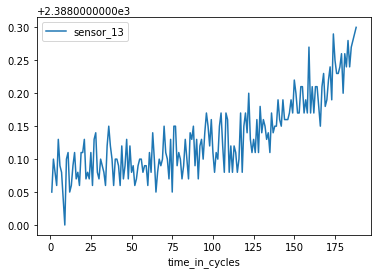

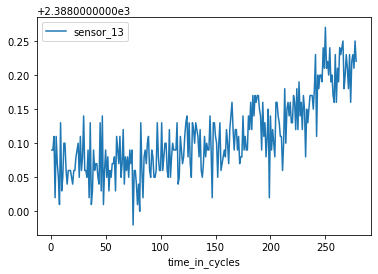

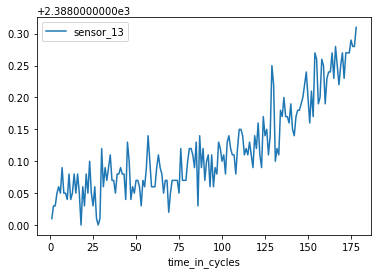

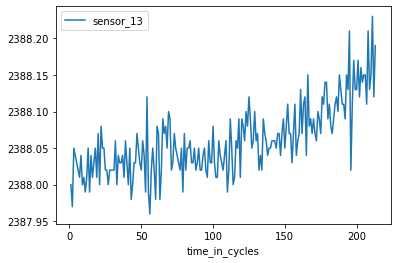

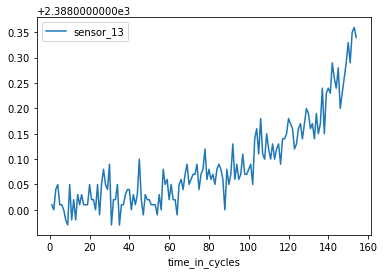

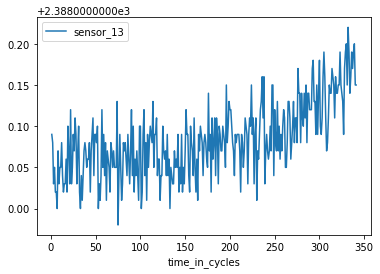

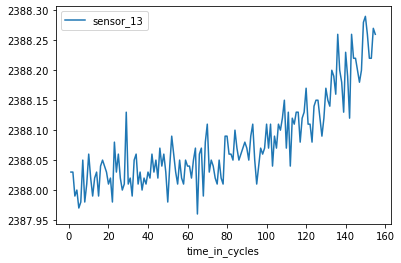

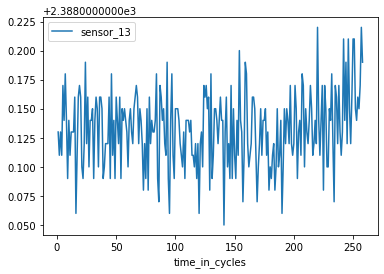

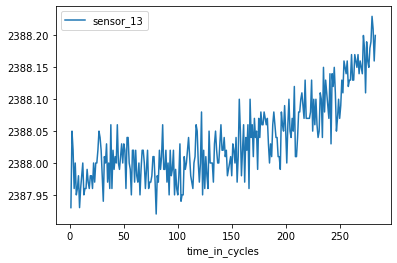

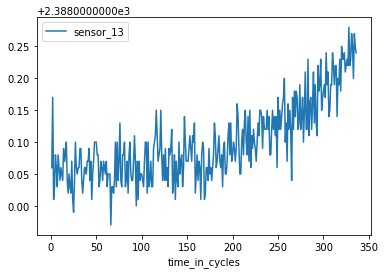

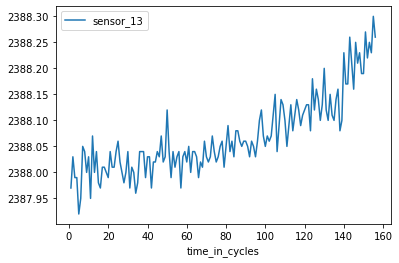

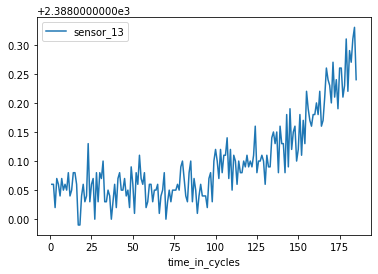

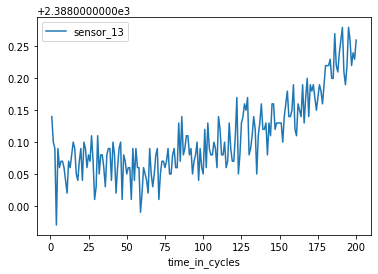

In [76]:
for unit in df_work['unit_number'].unique():
    df_work[df_work['unit_number'] == unit][['time_in_cycles', 'sensor_13']].plot(x='time_in_cycles', y='sensor_13')

**✅ No outlier handling needed**

Our task is not about cleaning noise — it's about understanding how sensors evolve before failure.

We move forward to the next phase: EDA

## SAVE DATASETS

Save what we've done in df_work, cat and num with a sufix.

Pickle helps us keeping any change on metadata.

### Define output file paths

In [80]:
PATH_DF_WORK  = WORK_PATH + 'df_work_data_quality.pickle'
PATH_CAT = WORK_PATH + 'cat_data_quality.pickle'
PATH_NUM = WORK_PATH + 'num_data_quality.pickle'

### Save datasets

In [81]:
df_work.to_pickle(PATH_DF_WORK)
cat.to_pickle(PATH_CAT)
num.to_pickle(PATH_NUM)